<a href="https://colab.research.google.com/github/hiprasasti/Hotel-Booking-Analysis/blob/main/230823_City_Hotel%2C_Portugal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Additional Information**



*   ADR [Numeric]: Average Daily Rate as defined
*   Adults [Integer]: Number of adults
*   Agent [Categorical]: ID of the travel agency that made the booking
*   Arrival Date Day Of Month [Integer]:Day of the month of the arrival date
*   Arrival Date Month [Categorical]: Month of arrival date with 12 categories: “January” to “December”
*   Arrival Date Week Number [Integer]: Week number of the arrival date
*   Arrival Date Year [Integer]: Year of arrival date
*   Assigned Room Type [Categorical]: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
*   Babies [Integer]: Number of babies
*   Booking Changes [Integer]: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
*   Children [Integer]: Number of children
*   Company [Integer]: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.
*   Country [Categorical]: Country of origin. Categories are represented in the ISO 3155–3:2013 format.
*   Customer Type [Categorical]: Type of booking, assuming one of four categories, Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.
*   Days I nWaiting List [Integer]: Number of days the booking was in the waiting list before it was confirmed to the customer.
*   Deposit Type [Categorical]: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:No Deposit – no deposit was made, in case no payments were found the value is “No Deposit”; If the payment was equal or exceeded the total cost of stay, the value is set as “Non Refund”, Non Refund – a deposit was made in the value of the total stay cost; Otherwise the value is set as “Refundable”, Refundable – a deposit was made with a value under the total cost of stay.
*   Distribution Channel [Categorical]: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
*   Is Canceled [Categorical]: Value indicating if the booking was canceled (1) or not (0).
*   Is Repeated Guest [Categorical]: Value indicating if the booking name was from a repeated guest (1) or not (0).
*   Lead Time [Integer]: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
*   Market Segment [Categorical]: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
*   Meal [Categorical]: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner).
*   Previous Bookings Not Canceled [Integer]: Number of previous bookings not cancelled by the customer prior to the current booking.
*   Previous Cancellations [Integer]: Number of previous bookings that were cancelled by the customer prior to the current booking.
*   Required Card Parking Spaces [Integer]: Number of car parking spaces required by the customer.
*   Reservation Status [Categorical]: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.
*   Reservation Status Date [Date]: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.
*   Reserved Room Type [Categorical]: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
*   Stays In Weekend Nights [Integer]: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
*   Stays In Week Nights [Integer]: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.
*   Total Of Special Requests [Integer]: Number of special requests made by the customer (e.g. twin bed or high floor).



# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import classification_report, confusion_matrix

# **Import Dataset**

**City Hotel, Portugal**

In [ ]:
CH_Portugal_url = 'https://docs.google.com/spreadsheets/d/1C_8YMDLRb2d8xAzL--S7OimAFSTsrheK/edit#gid=1720692572'
CH_Portugal = CH_Portugal_url.replace('/edit#gid=', '/export?format=csv&gid=')
CityHotel = pd.read_csv(CH_Portugal)
CityHotel

,hotel,is_canceled,lead_time,arrival_date,arrival_date_day,arrival_month,arrival_year,arrival_month_year,arrival_date_week_number,stays_in_weekend_nights,...,agent,is_use_agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,1,88,1-Jul-2015,1,Jul,2015,Jul 2015,27,0,...,9,1,0,0,Transient,765,0,1,Canceled,1-Jul-2015
1,City Hotel,1,65,1-Jul-2015,1,Jul,2015,Jul 2015,27,0,...,9,1,0,0,Transient,68,0,1,Canceled,30-Apr-2015
2,City Hotel,1,92,1-Jul-2015,1,Jul,2015,Jul 2015,27,2,...,9,1,0,0,Transient,765,0,2,Canceled,23-Jun-2015
3,City Hotel,1,100,2-Jul-2015,2,Jul,2015,Jul 2015,27,0,...,9,1,0,0,Transient,765,0,1,Canceled,2-Apr-2015
4,City Hotel,1,79,2-Jul-2015,2,Jul,2015,Jul 2015,27,0,...,9,1,0,0,Transient,765,0,1,Canceled,25-Jun-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79294,City Hotel,0,23,30-Aug-2017,30,Aug,2017,Aug 2017,35,2,...,394,1,0,0,Transient,9614,0,0,Check-Out,6-Sep-2017
79295,City Hotel,0,102,31-Aug-2017,31,Aug,2017,Aug 2017,35,2,...,9,1,0,0,Transient,22543,0,2,Check-Out,7-Sep-2017
79296,City Hotel,0,34,31-Aug-2017,31,Aug,2017,Aug 2017,35,2,...,9,1,0,0,Transient,15771,0,4,Check-Out,7-Sep-2017
79297,City Hotel,0,109,31-Aug-2017,31,Aug,2017,Aug 2017,35,2,...,89,1,0,0,Transient,1044,0,0,Check-Out,7-Sep-2017


In [ ]:
CityHotel.shape

(79299, 39)

# **Cleaning Process**

**Data Info**

In [ ]:
CityHotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79299 entries, 0 to 79298
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   hotel                           79299 non-null  object
 1   is_canceled                     79299 non-null  int64 
 2   lead_time                       79299 non-null  int64 
 3   arrival_date                    79299 non-null  object
 4   arrival_date_day                79299 non-null  int64 
 5   arrival_month                   79299 non-null  object
 6   arrival_year                    79299 non-null  int64 
 7   arrival_month_year              79299 non-null  object
 8   arrival_date_week_number        79299 non-null  int64 
 9   stays_in_weekend_nights         79299 non-null  int64 
 10  stays_in_week_nights            79299 non-null  int64 
 11  length_of_stay                  79299 non-null  int64 
 12  adults                          79299 non-null

**Missing Value**

In [ ]:
CityHotel.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date                      0
arrival_date_day                  0
arrival_month                     0
arrival_year                      0
arrival_month_year                0
arrival_date_week_number          0
stays_in_weekend_nights           0
stays_in_week_nights              0
length_of_stay                    0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
continent                         0
subregion                         0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
is_room_change                    0
booking_changes             

**String Manipulation**

In [ ]:
#CustDemo['customer_id'] = CustDemo['customer_id'].astype(str)

In [ ]:
#CityHotel['is_canceled'] = CityHotel['is_canceled'].astype(str)

In [ ]:
CityHotel['is_repeated_guest'] = CityHotel['is_repeated_guest'].astype(str)

In [ ]:
CityHotel['is_room_change'] = CityHotel['is_room_change'].astype(str)

In [ ]:
CityHotel['is_use_agent'] = CityHotel['is_use_agent'].astype(str)

**Date Manipulation**

In [ ]:
CityHotel['arrival_date'] = CityHotel['arrival_date'].apply(pd.to_datetime)

In [ ]:
CityHotel['reservation_status_date'] = CityHotel['reservation_status_date'].apply(pd.to_datetime)

**Float Manipulation**

**Filtering Row**

Dropped rows with 0 zero in adults, children, and babies at the time.

In [ ]:
filter = (CityHotel.children ==0) & (CityHotel.adults == 0) & (CityHotel.babies == 0)
CityHotel[filter]

,hotel,is_canceled,lead_time,arrival_date,arrival_date_day,arrival_month,arrival_year,arrival_month_year,arrival_date_week_number,stays_in_weekend_nights,...,agent,is_use_agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
331,City Hotel,0,132,2015-07-23,23,Jul,2015,Jul 2015,30,2,...,1,1,0,0,Transient-Party,0,0,0,Check-Out,2015-07-30
858,City Hotel,0,0,2015-08-09,9,Aug,2015,Aug 2015,33,2,...,9,1,0,0,Contract,0,0,0,Check-Out,2015-08-11
954,City Hotel,0,0,2015-08-10,10,Aug,2015,Aug 2015,33,9,...,0,0,47,0,Transient,0,0,0,Check-Out,2015-09-08
990,City Hotel,0,0,2015-08-11,11,Aug,2015,Aug 2015,33,0,...,0,0,49,0,Transient-Party,0,0,1,Check-Out,2015-08-15
2385,City Hotel,1,1,2015-09-06,6,Sep,2015,Sep 2015,37,2,...,1,1,0,0,Transient-Party,0,0,0,Canceled,2015-09-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74938,City Hotel,0,107,2017-06-27,27,Jun,2017,Jun 2017,26,0,...,7,1,0,0,Transient,1008,0,0,Check-Out,2017-06-30
75000,City Hotel,0,1,2017-06-30,30,Jun,2017,Jun 2017,26,0,...,0,0,0,0,Transient,0,1,1,Check-Out,2017-07-01
76160,City Hotel,0,44,2017-07-15,15,Jul,2017,Jul 2017,28,1,...,425,1,0,0,Transient,738,0,0,Check-Out,2017-07-17
76443,City Hotel,0,2,2017-07-15,15,Jul,2017,Jul 2017,28,2,...,9,1,0,0,Transient-Party,2286,0,1,Check-Out,2017-07-22


In [ ]:
CityHotel = CityHotel[~((CityHotel['adults']==0) & (CityHotel['children']==0) & (CityHotel['babies']==0))]
CityHotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79140 entries, 0 to 79298
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           79140 non-null  object        
 1   is_canceled                     79140 non-null  int64         
 2   lead_time                       79140 non-null  int64         
 3   arrival_date                    79140 non-null  datetime64[ns]
 4   arrival_date_day                79140 non-null  int64         
 5   arrival_month                   79140 non-null  object        
 6   arrival_year                    79140 non-null  int64         
 7   arrival_month_year              79140 non-null  object        
 8   arrival_date_week_number        79140 non-null  int64         
 9   stays_in_weekend_nights         79140 non-null  int64         
 10  stays_in_week_nights            79140 non-null  int64         
 11  le

# **Checking Typo and Counts**

**Organized Column**

## **Variable and Counts**

In [ ]:
for col in CityHotel.columns:
  print(CityHotel[col].value_counts())

City Hotel    79140
Name: hotel, dtype: int64
0    46079
1    33061
Name: is_canceled, dtype: int64
0      3030
1      1849
2      1125
4      1047
3      1020
       ... 
387       1
366       1
458       1
347       1
463       1
Name: lead_time, Length: 453, dtype: int64
2015-10-16    339
2016-10-13    322
2016-11-07    319
2015-09-18    311
2017-05-19    291
             ... 
2015-07-24      7
2015-08-02      6
2015-07-26      6
2015-07-14      6
2015-12-07      6
Name: arrival_date, Length: 793, dtype: int64
17    3007
15    2853
5     2848
20    2830
25    2819
19    2743
26    2742
9     2686
8     2674
28    2666
2     2666
16    2645
6     2628
18    2621
24    2613
13    2602
14    2594
21    2560
27    2527
3     2521
12    2506
4     2458
7     2452
23    2442
10    2382
30    2375
29    2366
1     2325
22    2323
11    2315
31    1351
Name: arrival_date_day, dtype: int64
Aug    8961
May    8221
Jul    8070
Jun    7885
Oct    7580
Apr    7469
Sep    7392
Mar    6434
Feb    

# **Checking Outliers**

In [ ]:
CH = CityHotel.copy()

In [ ]:
CH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79140 entries, 0 to 79298
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           79140 non-null  object        
 1   is_canceled                     79140 non-null  int64         
 2   lead_time                       79140 non-null  int64         
 3   arrival_date                    79140 non-null  datetime64[ns]
 4   arrival_date_day                79140 non-null  int64         
 5   arrival_month                   79140 non-null  object        
 6   arrival_year                    79140 non-null  int64         
 7   arrival_month_year              79140 non-null  object        
 8   arrival_date_week_number        79140 non-null  int64         
 9   stays_in_weekend_nights         79140 non-null  int64         
 10  stays_in_week_nights            79140 non-null  int64         
 11  le

In [ ]:
CH.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,79140.0,0.417753,0.493192,0.0,0.0,0.0,1.0,1.0
lead_time,79140.0,109.881526,110.969533,0.0,23.0,74.0,164.0,629.0
arrival_date_day,79140.0,15.789121,8.729555,1.0,8.0,16.0,23.0,31.0
arrival_year,79140.0,2016.174501,0.699043,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,79140.0,27.171847,13.393254,1.0,17.0,27.0,38.0,53.0
stays_in_weekend_nights,79140.0,0.794238,0.878708,0.0,0.0,1.0,2.0,14.0
stays_in_week_nights,79140.0,2.180629,1.433167,0.0,1.0,2.0,3.0,34.0
length_of_stay,79140.0,2.974867,1.826255,0.0,2.0,3.0,4.0,48.0
adults,79140.0,1.854852,0.502709,0.0,2.0,2.0,2.0,4.0
children,79140.0,0.091585,0.372588,0.0,0.0,0.0,0.0,3.0


**lead_time**

In [ ]:
# Calculate quartile 1 and 3
Q1 = CH['lead_time'].quantile(0.25)
Q3 = CH['lead_time'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 23.0

Q3:
 164.0

IQR:
 141.0

Min:
 -188.5

Max:
 375.5


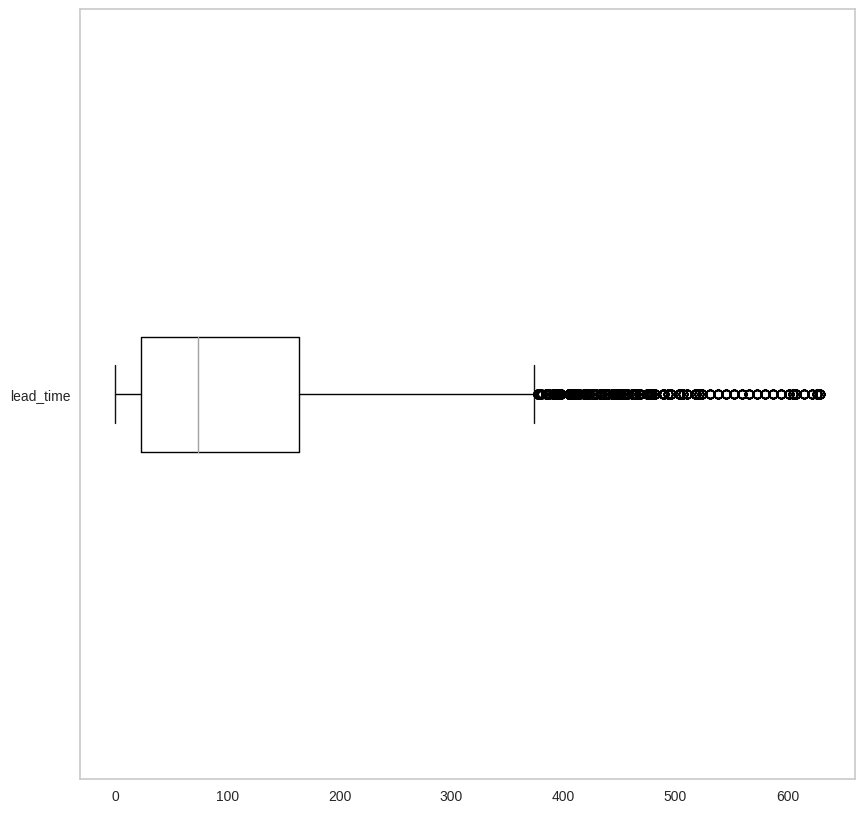

In [ ]:
CH.boxplot(column=['lead_time'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)
plt.show()

**length_of_stay**

In [ ]:
# Calculate quartile 1 and 3
Q1 = CH['length_of_stay'].quantile(0.25)
Q3 = CH['length_of_stay'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 2.0

Q3:
 4.0

IQR:
 2.0

Min:
 -1.0

Max:
 7.0


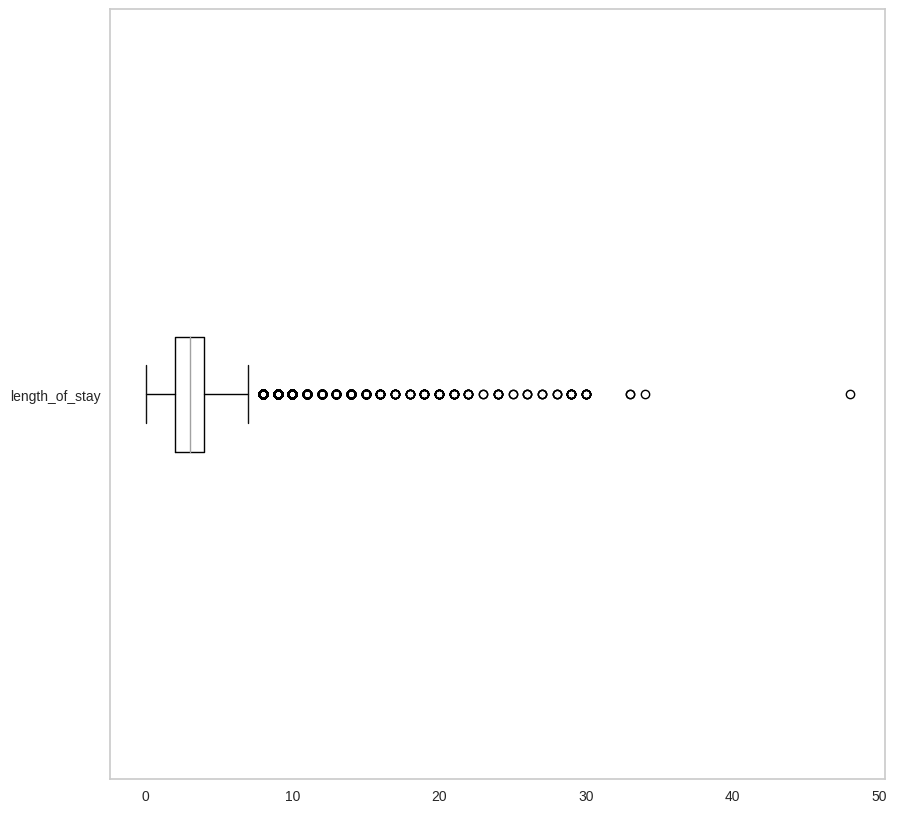

In [ ]:
CH.boxplot(column=['length_of_stay'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)
plt.show()

**adults**

In [ ]:
# Calculate quartile 1 and 3
Q1 = CH['adults'].quantile(0.25)
Q3 = CH['adults'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 2.0

Q3:
 2.0

IQR:
 0.0

Min:
 2.0

Max:
 2.0


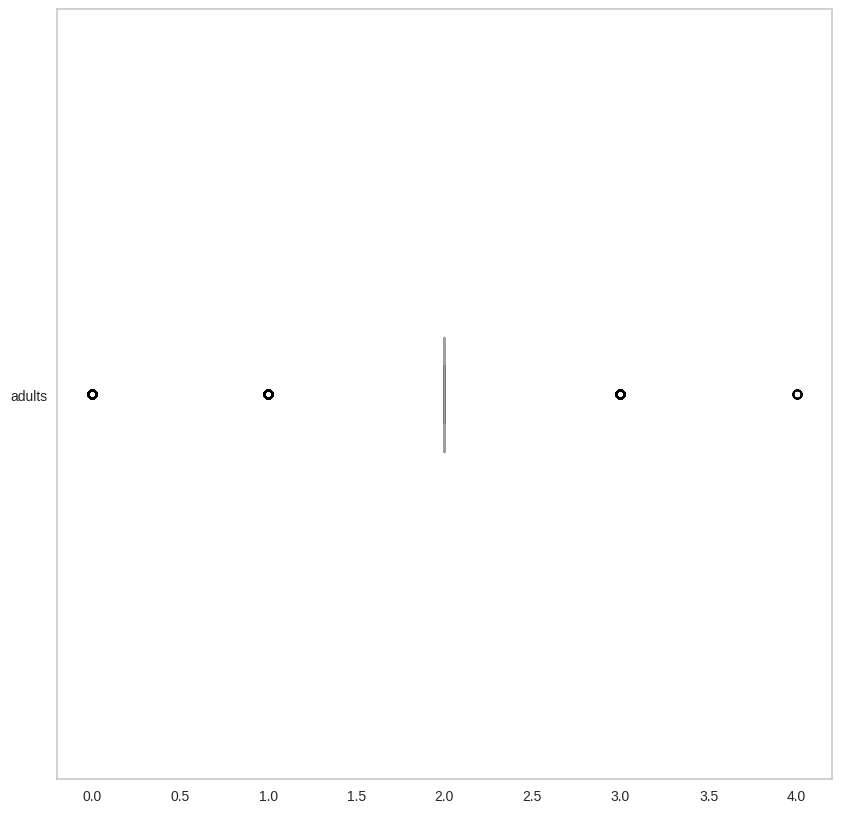

In [ ]:
CH.boxplot(column=['adults'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)
plt.show()

**previous_cancellations**

In [ ]:
# Calculate quartile 1 and 3
Q1 = CH['previous_cancellations'].quantile(0.25)
Q3 = CH['previous_cancellations'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 0.0

Q3:
 0.0

IQR:
 0.0

Min:
 0.0

Max:
 0.0


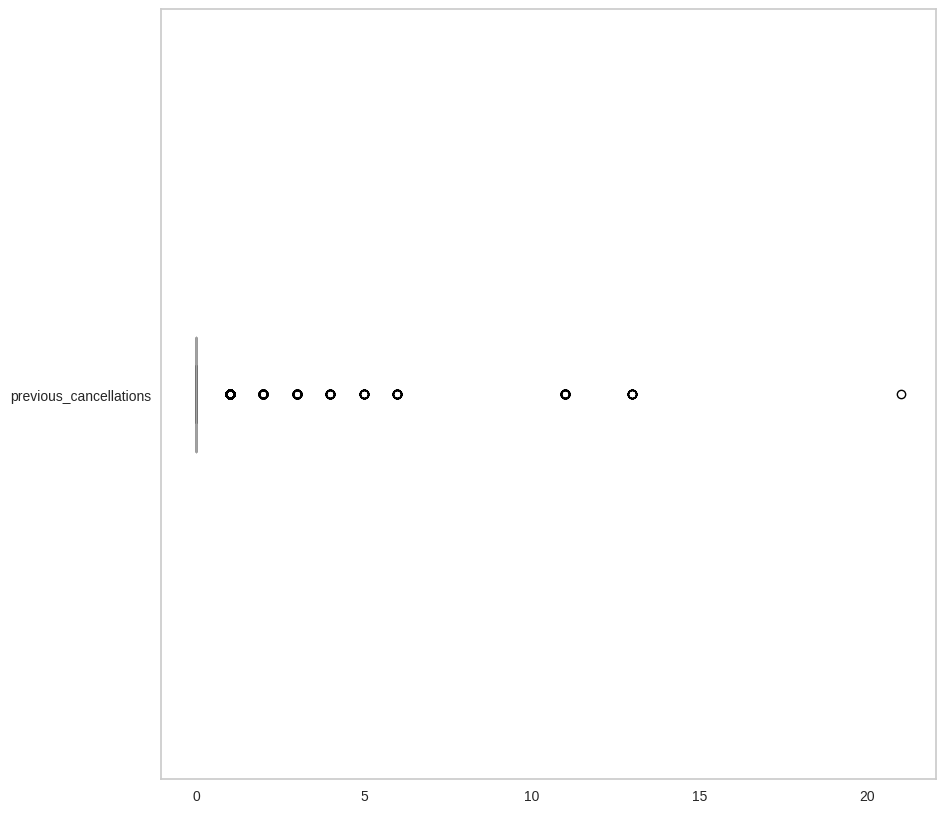

In [ ]:
CH.boxplot(column=['previous_cancellations'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)
plt.show()

**booking_changes**

In [ ]:
# Calculate quartile 1 and 3
Q1 = CH['booking_changes'].quantile(0.25)
Q3 = CH['booking_changes'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 0.0

Q3:
 0.0

IQR:
 0.0

Min:
 0.0

Max:
 0.0


**days_in_waiting_list**

In [ ]:
# Calculate quartile 1 and 3
Q1 = CH['days_in_waiting_list'].quantile(0.25)
Q3 = CH['days_in_waiting_list'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 0.0

Q3:
 0.0

IQR:
 0.0

Min:
 0.0

Max:
 0.0


**adr**

In [ ]:
# Calculate quartile 1 and 3
Q1 = CH['adr'].quantile(0.25)
Q3 = CH['adr'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 90.0

Q3:
 1251.0

IQR:
 1161.0

Min:
 -1651.5

Max:
 2992.5


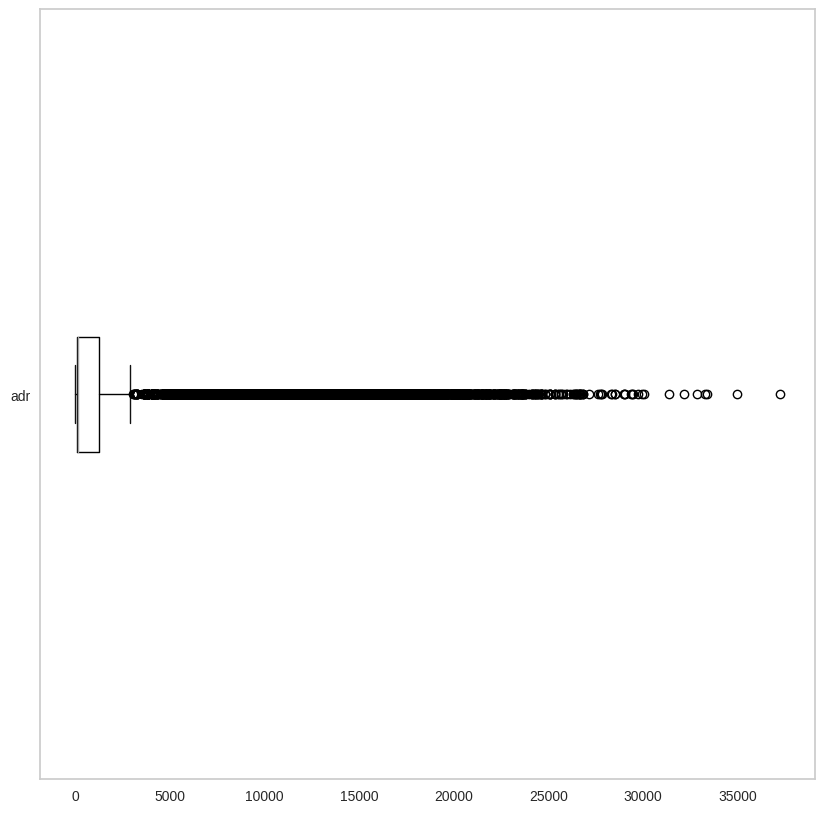

In [ ]:
CH.boxplot(column=['adr'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)
plt.show()

**required_car_parking_space**

In [ ]:
# Calculate quartile 1 and 3
Q1 = CH['required_car_parking_spaces'].quantile(0.25)
Q3 = CH['required_car_parking_spaces'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 0.0

Q3:
 0.0

IQR:
 0.0

Min:
 0.0

Max:
 0.0


**total_of_special_request**

In [ ]:
# Calculate quartile 1 and 3
Q1 = CH['total_of_special_requests'].quantile(0.25)
Q3 = CH['total_of_special_requests'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 0.0

Q3:
 1.0

IQR:
 1.0

Min:
 -1.5

Max:
 2.5


# **Exploratory Data Analysis**

**Percentage Cancellation**

In [ ]:
is_can = len(CH[CH['is_canceled']==1])
print("Percentage cancellation= ", is_can/len(CH))
CH['reservation_status'].value_counts(normalize=True)*100

Percentage cancellation=  0.4177533484963356


Check-Out    58.224665
Canceled     40.619156
No-Show       1.156179
Name: reservation_status, dtype: float64

**Number of Guest**

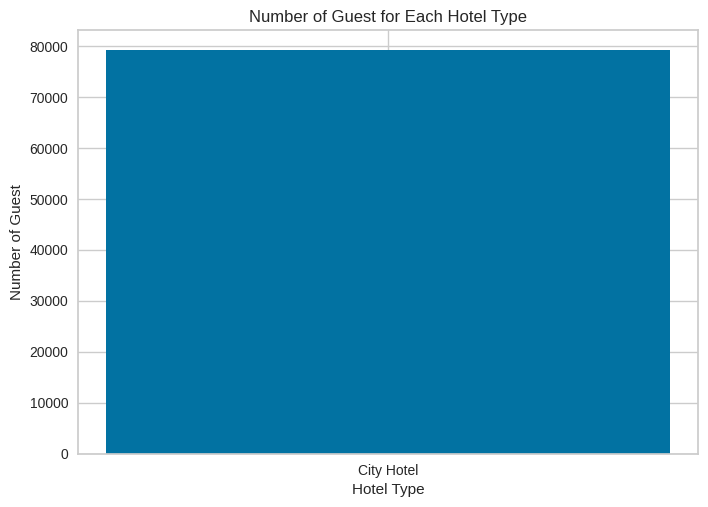

In [ ]:
city_len = len(CH[CH['hotel']=='City Hotel'])

hotel_types = ['City Hotel']
lengths = [city_len]

plt.bar(hotel_types, lengths)
plt.xlabel('Hotel Type')
plt.ylabel('Number of Guest')
plt.title('Number of Guest for Each Hotel Type')
plt.show()

**Country Wise**

In [ ]:
country_wise_counts = CH[CH['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_counts.columns = ['country', 'No of guests']
country_wise_counts

,country,No of guests
0,PRT,10792
1,FRA,7069
2,DEU,5010
3,GBR,3746
4,ESP,3278
...,...,...
145,GUY,1
146,UGA,1
147,PYF,1
148,SYC,1


In [ ]:
import folium
from folium.plugins import HeatMap
import plotly.express as px

In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_counts, locations = country_wise_counts['country'],
color= country_wise_counts['No of guests'],
hover_name = country_wise_counts['country'])
guests_map.show()

Most guests are from Portugal and French, Germany, Italy, Spain and UK.

**Average Price per Room**

In [ ]:
dfCH= CH[CH['is_canceled']==0]
px.box(data_frame = dfCH, x='reserved_room_type', y='adr', color= 'hotel', template= 'plotly_dark')

**Average ADR per Month**

In [ ]:
data_city= CH[(CH['hotel']=='City Hotel')&(CH['is_canceled']==0)]

In [ ]:
city_hotel= data_city.groupby(['arrival_month'])['adr'].mean().reset_index()
city_hotel

,arrival_month,adr
0,Apr,2544.820698
1,Aug,2652.035042
2,Dec,2631.147244
3,Feb,1539.374959
4,Jan,1883.180080
5,Jul,2970.800168
6,Jun,2782.047958
7,Mar,2239.716720
8,May,2480.396673
9,Nov,2192.942408


**ADR per Month Order**

In [ ]:
# Define the sort_month function
def sort_month(df, column_name):
    sorted_df = df.sort_values(by=column_name)
    return sorted_df

In [ ]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
city_hotel['arrival_month']= pd.Categorical(city_hotel['arrival_month'],categories=month_order, ordered=True)
final_prices= city_hotel.sort_values(by='arrival_month')
print(final_prices)

   arrival_month          adr
4            Jan  1883.180080
3            Feb  1539.374959
7            Mar  2239.716720
0            Apr  2544.820698
8            May  2480.396673
6            Jun  2782.047958
5            Jul  2970.800168
1            Aug  2652.035042
11           Sep  2789.473033
10           Oct  2880.745955
9            Nov  2192.942408
2            Dec  2631.147244


In [ ]:
final_prices = sort_month(city_hotel, 'arrival_month')
final_prices

,arrival_month,adr
4,Jan,1883.180080
3,Feb,1539.374959
7,Mar,2239.716720
0,Apr,2544.820698
8,May,2480.396673
6,Jun,2782.047958
5,Jul,2970.800168
1,Aug,2652.035042
11,Sep,2789.473033
10,Oct,2880.745955


**Room Price per Night Over the Months**

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
plt.figure(figsize=(19, 10))

fig = px.line(final_prices, x='arrival_month', y='adr',
              title='Room Price per Night Over the Months',
              template='plotly_dark')

fig.show()

<Figure size 1900x1000 with 0 Axes>

City Hotel- expensive in July and Oct

**Length os Stay**

In [ ]:
filter=CH['is_canceled']==0
CH_EDA=CH[filter]
CH_EDA

,hotel,is_canceled,lead_time,arrival_date,arrival_date_day,arrival_month,arrival_year,arrival_month_year,arrival_date_week_number,stays_in_weekend_nights,...,agent,is_use_agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,City Hotel,0,3,2015-07-02,2,Jul,2015,Jul 2015,27,0,...,1,1,0,0,Transient-Party,5867,0,0,Check-Out,2015-07-05
9,City Hotel,0,43,2015-07-03,3,Jul,2015,Jul 2015,27,0,...,1,1,0,0,Transient-Party,86,0,0,Check-Out,2015-07-05
10,City Hotel,0,43,2015-07-03,3,Jul,2015,Jul 2015,27,0,...,1,1,0,0,Transient-Party,43,0,0,Check-Out,2015-07-05
11,City Hotel,0,43,2015-07-03,3,Jul,2015,Jul 2015,27,0,...,1,1,0,0,Transient-Party,86,0,0,Check-Out,2015-07-05
12,City Hotel,0,4,2015-07-03,3,Jul,2015,Jul 2015,27,0,...,1,1,0,0,Transient-Party,63,0,0,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79294,City Hotel,0,23,2017-08-30,30,Aug,2017,Aug 2017,35,2,...,394,1,0,0,Transient,9614,0,0,Check-Out,2017-09-06
79295,City Hotel,0,102,2017-08-31,31,Aug,2017,Aug 2017,35,2,...,9,1,0,0,Transient,22543,0,2,Check-Out,2017-09-07
79296,City Hotel,0,34,2017-08-31,31,Aug,2017,Aug 2017,35,2,...,9,1,0,0,Transient,15771,0,4,Check-Out,2017-09-07
79297,City Hotel,0,109,2017-08-31,31,Aug,2017,Aug 2017,35,2,...,89,1,0,0,Transient,1044,0,0,Check-Out,2017-09-07


In [ ]:
CH_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46079 entries, 5 to 79298
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           46079 non-null  object        
 1   is_canceled                     46079 non-null  int64         
 2   lead_time                       46079 non-null  int64         
 3   arrival_date                    46079 non-null  datetime64[ns]
 4   arrival_date_day                46079 non-null  int64         
 5   arrival_month                   46079 non-null  object        
 6   arrival_year                    46079 non-null  int64         
 7   arrival_month_year              46079 non-null  object        
 8   arrival_date_week_number        46079 non-null  int64         
 9   stays_in_weekend_nights         46079 non-null  int64         
 10  stays_in_week_nights            46079 non-null  int64         
 11  le

In [ ]:
stay= CH_EDA.groupby(['length_of_stay', 'hotel']).agg('count').reset_index()
stay= stay.iloc[:, :3]
stay= stay.rename(columns={'is_canceled':"Number of stays"})
stay

,length_of_stay,hotel,Number of stays
0,0,City Hotel,251
1,1,City Hotel,9155
2,2,City Hotel,10982
3,3,City Hotel,11888
4,4,City Hotel,7692
5,5,City Hotel,3210
6,6,City Hotel,1111
7,7,City Hotel,1244
8,8,City Hotel,205
9,9,City Hotel,119


In [ ]:
px.bar(data_frame= stay, x='length_of_stay', y= 'Number of stays',
       color= 'hotel', barmode= 'group', template= 'plotly_dark')


**Weekend Stays by Market Segment**

<Axes: xlabel='market_segment', ylabel='stays_in_weekend_nights'>

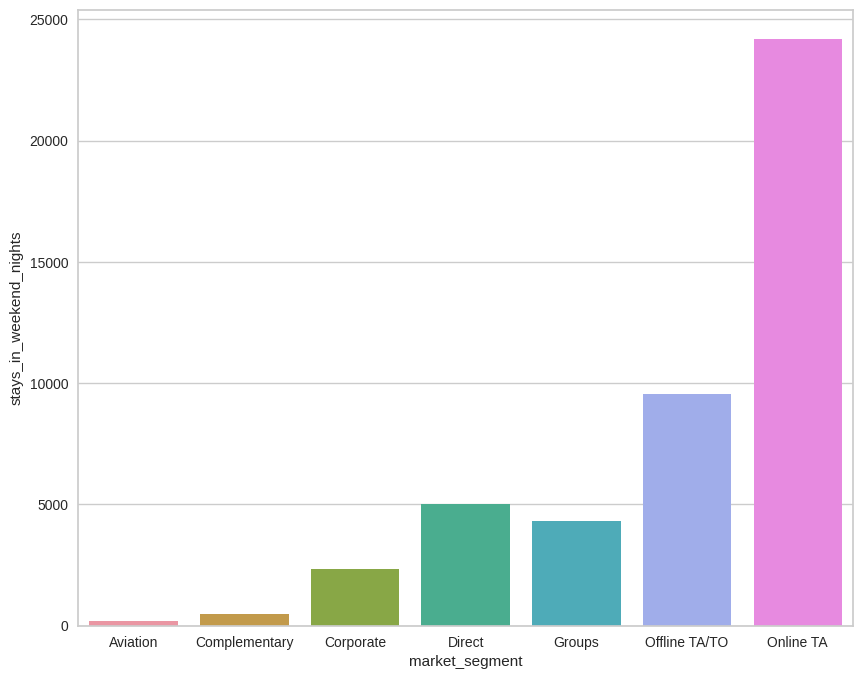

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=CH[CH['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count().index,
            y= CH[CH['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count())

**Weekday Stay by Market Segment**

<Axes: xlabel='market_segment', ylabel='stays_in_week_nights'>

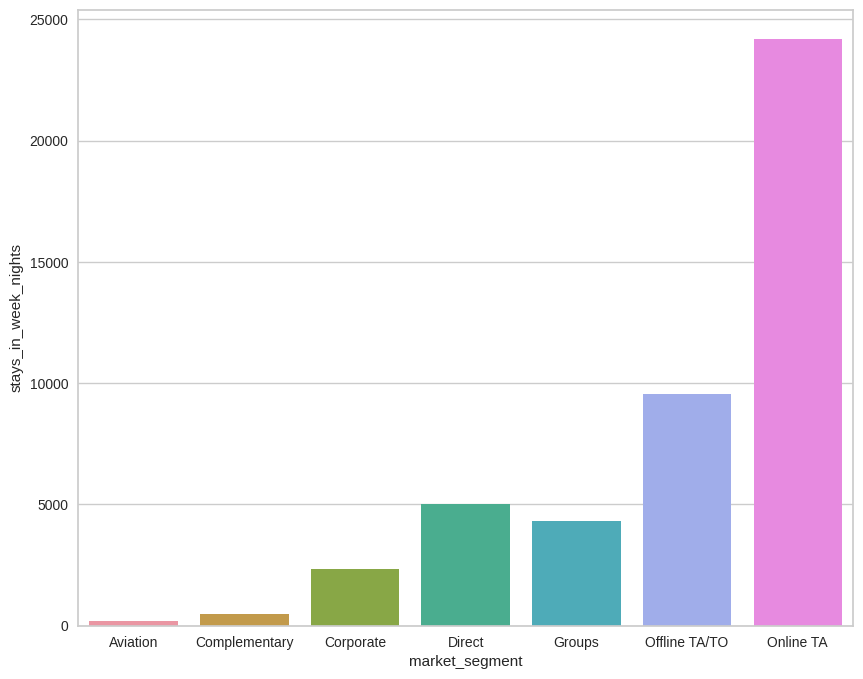

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=CH[CH['is_canceled']==0].groupby('market_segment')['stays_in_week_nights'].count().index,
            y= CH[CH['is_canceled']==0].groupby('market_segment')['stays_in_week_nights'].count())

In [ ]:
CH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79140 entries, 0 to 79298
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           79140 non-null  object        
 1   is_canceled                     79140 non-null  int64         
 2   lead_time                       79140 non-null  int64         
 3   arrival_date                    79140 non-null  datetime64[ns]
 4   arrival_date_day                79140 non-null  int64         
 5   arrival_month                   79140 non-null  object        
 6   arrival_year                    79140 non-null  int64         
 7   arrival_month_year              79140 non-null  object        
 8   arrival_date_week_number        79140 non-null  int64         
 9   stays_in_weekend_nights         79140 non-null  int64         
 10  stays_in_week_nights            79140 non-null  int64         
 11  le

<ipython-input-70-b478823ad901>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



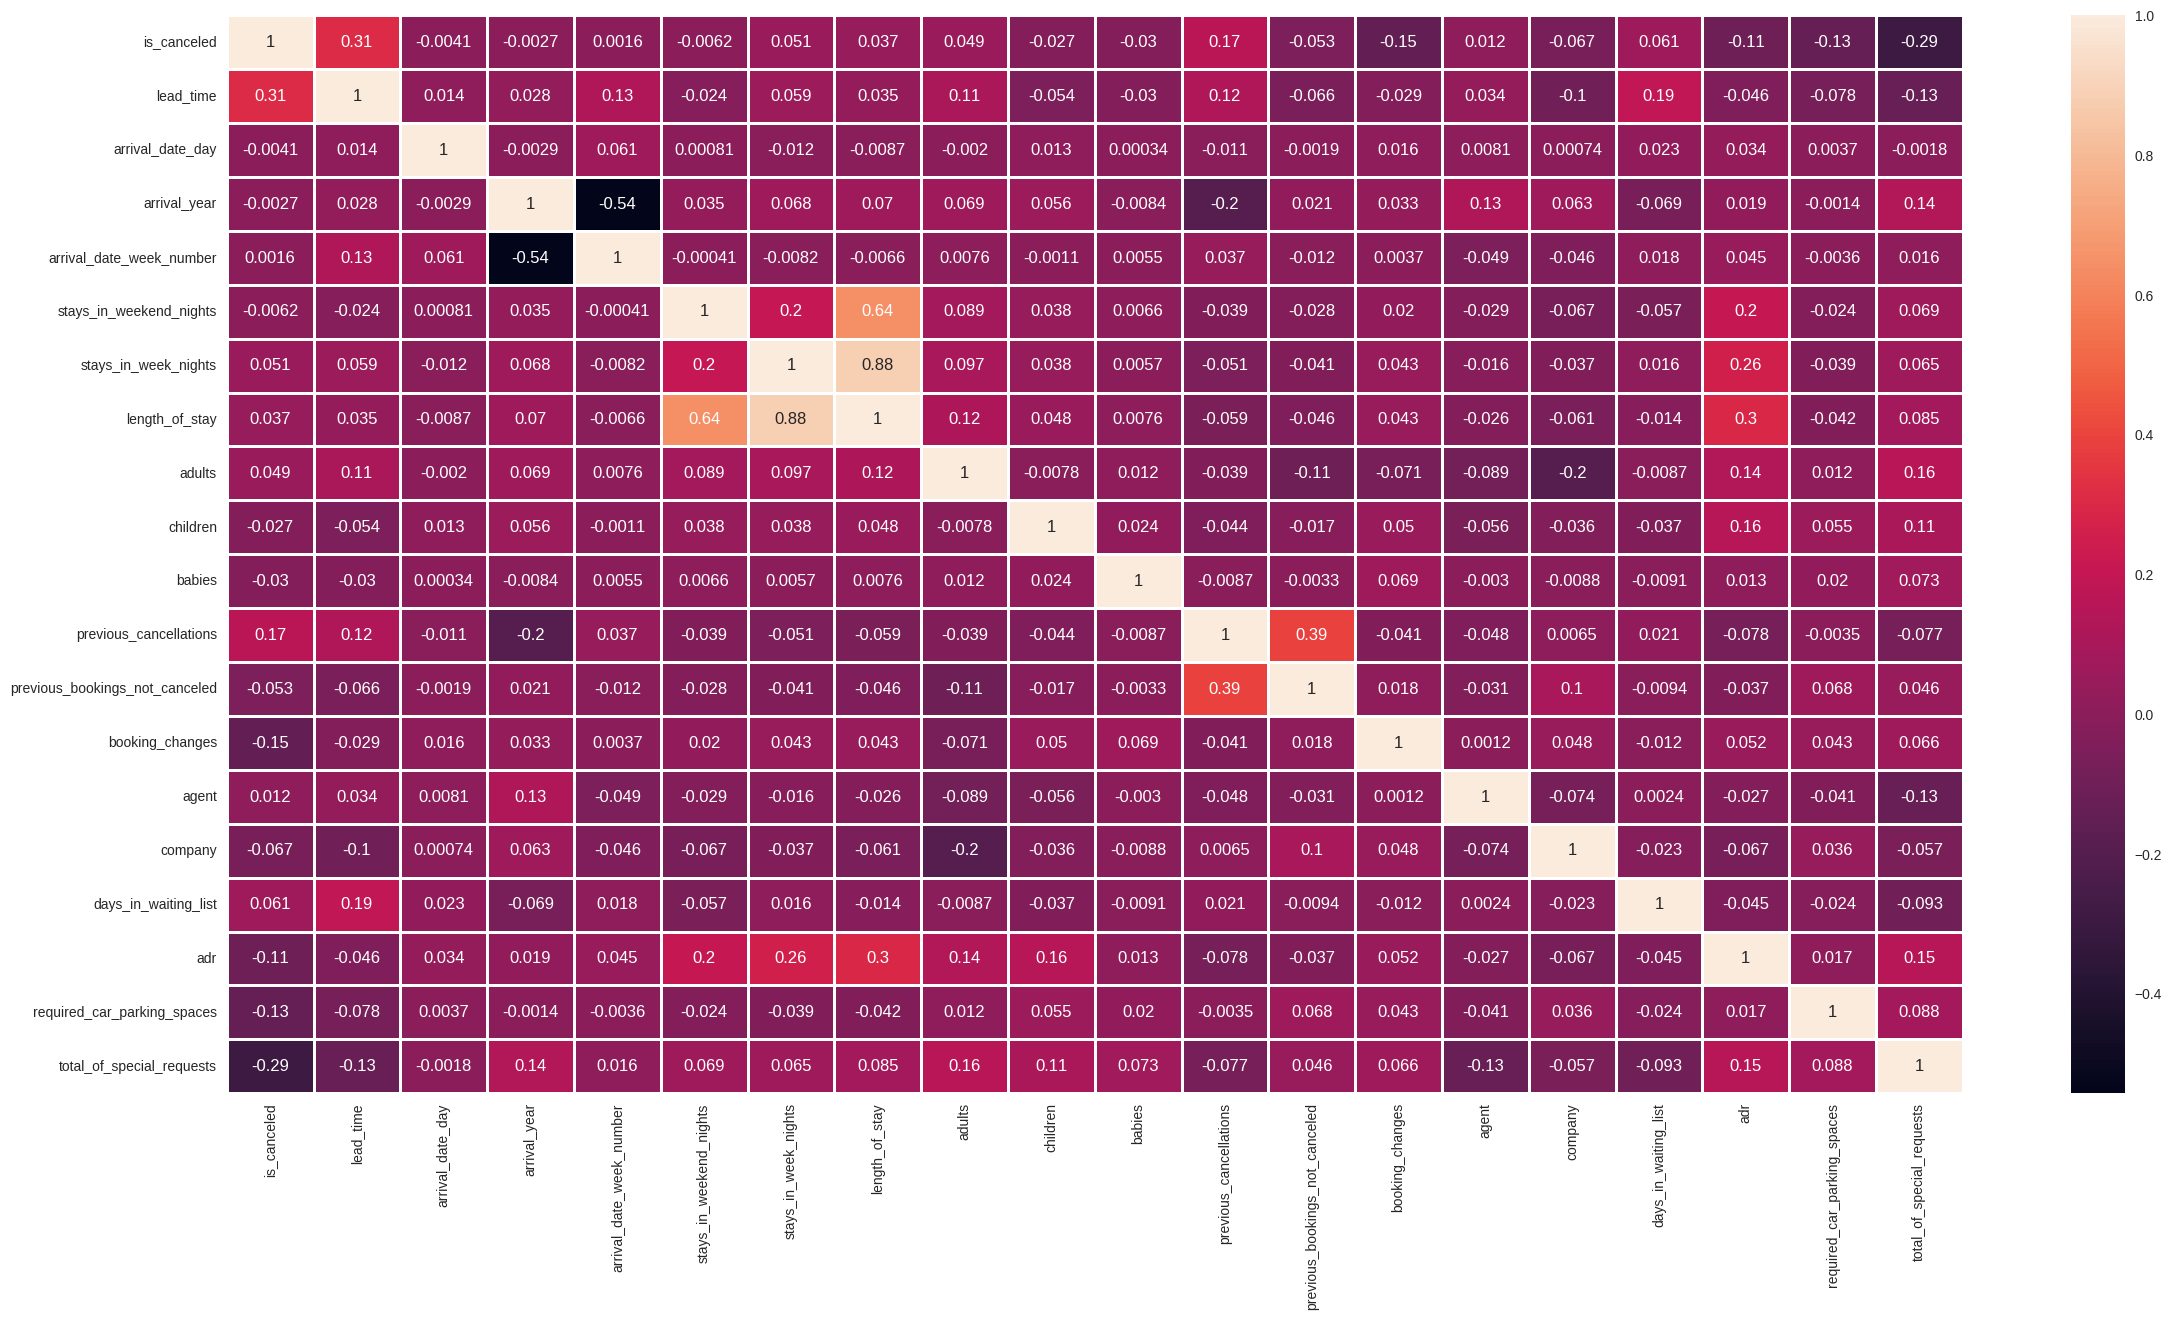

In [ ]:
plt.figure(figsize = (28, 14))

corr = CH.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [ ]:
CH.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date', 'arrival_date_day',
       'arrival_month', 'arrival_year', 'arrival_month_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'length_of_stay', 'adults', 'children',
       'babies', 'meal', 'country', 'continent', 'subregion', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'is_room_change', 'booking_changes',
       'deposit_type', 'agent', 'is_use_agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
CH= CH.drop_duplicates()
len(CH)

53264

In [ ]:
drop_city = CH.copy()

In [ ]:
drop_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53264 entries, 0 to 79298
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           53264 non-null  object        
 1   is_canceled                     53264 non-null  int64         
 2   lead_time                       53264 non-null  int64         
 3   arrival_date                    53264 non-null  datetime64[ns]
 4   arrival_date_day                53264 non-null  int64         
 5   arrival_month                   53264 non-null  object        
 6   arrival_year                    53264 non-null  int64         
 7   arrival_month_year              53264 non-null  object        
 8   arrival_date_week_number        53264 non-null  int64         
 9   stays_in_weekend_nights         53264 non-null  int64         
 10  stays_in_week_nights            53264 non-null  int64         
 11  le

In [ ]:
label = ['company','agent','total_of_special_requests','required_car_parking_spaces','booking_changes',
         'is_repeated_guest','reservation_status_date','stays_in_weekend_nights','stays_in_week_nights',
         'reserved_room_type','assigned_room_type','adults','children','babies']
drop_city.drop(labels=label,axis=1,inplace=True)
drop_city

,hotel,is_canceled,lead_time,arrival_date,arrival_date_day,arrival_month,arrival_year,arrival_month_year,arrival_date_week_number,length_of_stay,...,distribution_channel,previous_cancellations,previous_bookings_not_canceled,is_room_change,deposit_type,is_use_agent,days_in_waiting_list,customer_type,adr,reservation_status
0,City Hotel,1,88,2015-07-01,1,Jul,2015,Jul 2015,27,4,...,TA/TO,0,0,0,No Deposit,1,0,Transient,765,Canceled
1,City Hotel,1,65,2015-07-01,1,Jul,2015,Jul 2015,27,4,...,TA/TO,0,0,0,No Deposit,1,0,Transient,68,Canceled
2,City Hotel,1,92,2015-07-01,1,Jul,2015,Jul 2015,27,6,...,TA/TO,0,0,0,No Deposit,1,0,Transient,765,Canceled
3,City Hotel,1,100,2015-07-02,2,Jul,2015,Jul 2015,27,2,...,TA/TO,0,0,0,No Deposit,1,0,Transient,765,Canceled
4,City Hotel,1,79,2015-07-02,2,Jul,2015,Jul 2015,27,3,...,TA/TO,0,0,0,No Deposit,1,0,Transient,765,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79294,City Hotel,0,23,2017-08-30,30,Aug,2017,Aug 2017,35,7,...,TA/TO,0,0,0,No Deposit,1,0,Transient,9614,Check-Out
79295,City Hotel,0,102,2017-08-31,31,Aug,2017,Aug 2017,35,7,...,TA/TO,0,0,0,No Deposit,1,0,Transient,22543,Check-Out
79296,City Hotel,0,34,2017-08-31,31,Aug,2017,Aug 2017,35,7,...,TA/TO,0,0,0,No Deposit,1,0,Transient,15771,Check-Out
79297,City Hotel,0,109,2017-08-31,31,Aug,2017,Aug 2017,35,7,...,TA/TO,0,0,0,No Deposit,1,0,Transient,1044,Check-Out


In [ ]:
X= drop_city.drop(['is_canceled'], axis=1)
Y= drop_city['is_canceled']

In [ ]:
X= pd.get_dummies(X, drop_first=True)

In [ ]:
X.shape, Y.shape

((53264, 266), (53264,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# **Correlation Analysis**

In [ ]:
City_CA = CH.copy()

In [ ]:
City_dropdup= City_CA.drop_duplicates()
len(City_dropdup)

53264

In [ ]:
City_dropdup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53264 entries, 0 to 79298
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           53264 non-null  object        
 1   is_canceled                     53264 non-null  int64         
 2   lead_time                       53264 non-null  int64         
 3   arrival_date                    53264 non-null  datetime64[ns]
 4   arrival_date_day                53264 non-null  int64         
 5   arrival_month                   53264 non-null  object        
 6   arrival_year                    53264 non-null  int64         
 7   arrival_month_year              53264 non-null  object        
 8   arrival_date_week_number        53264 non-null  int64         
 9   stays_in_weekend_nights         53264 non-null  int64         
 10  stays_in_week_nights            53264 non-null  int64         
 11  le

In [ ]:
City_CAdrop = City_dropdup.drop(['company','agent','total_of_special_requests','required_car_parking_spaces','booking_changes',
         'is_repeated_guest','reservation_status_date','stays_in_weekend_nights','stays_in_week_nights',
         'reserved_room_type','assigned_room_type','adults','children','babies'], axis=1)

In [ ]:
City_CAdrop

,hotel,is_canceled,lead_time,arrival_date,arrival_date_day,arrival_month,arrival_year,arrival_month_year,arrival_date_week_number,length_of_stay,...,distribution_channel,previous_cancellations,previous_bookings_not_canceled,is_room_change,deposit_type,is_use_agent,days_in_waiting_list,customer_type,adr,reservation_status
0,City Hotel,1,88,2015-07-01,1,Jul,2015,Jul 2015,27,4,...,TA/TO,0,0,0,No Deposit,1,0,Transient,765,Canceled
1,City Hotel,1,65,2015-07-01,1,Jul,2015,Jul 2015,27,4,...,TA/TO,0,0,0,No Deposit,1,0,Transient,68,Canceled
2,City Hotel,1,92,2015-07-01,1,Jul,2015,Jul 2015,27,6,...,TA/TO,0,0,0,No Deposit,1,0,Transient,765,Canceled
3,City Hotel,1,100,2015-07-02,2,Jul,2015,Jul 2015,27,2,...,TA/TO,0,0,0,No Deposit,1,0,Transient,765,Canceled
4,City Hotel,1,79,2015-07-02,2,Jul,2015,Jul 2015,27,3,...,TA/TO,0,0,0,No Deposit,1,0,Transient,765,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79294,City Hotel,0,23,2017-08-30,30,Aug,2017,Aug 2017,35,7,...,TA/TO,0,0,0,No Deposit,1,0,Transient,9614,Check-Out
79295,City Hotel,0,102,2017-08-31,31,Aug,2017,Aug 2017,35,7,...,TA/TO,0,0,0,No Deposit,1,0,Transient,22543,Check-Out
79296,City Hotel,0,34,2017-08-31,31,Aug,2017,Aug 2017,35,7,...,TA/TO,0,0,0,No Deposit,1,0,Transient,15771,Check-Out
79297,City Hotel,0,109,2017-08-31,31,Aug,2017,Aug 2017,35,7,...,TA/TO,0,0,0,No Deposit,1,0,Transient,1044,Check-Out


In [ ]:
#correlation_matrix = data.corr()
correlation_matrix = City_CAdrop.corr(method='pearson')
correlation_matrix

<ipython-input-56-b63f44b0d247>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,is_canceled,lead_time,arrival_date_day,arrival_year,arrival_date_week_number,length_of_stay,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr
is_canceled,1.000000,0.190761,0.004034,0.083222,-0.009187,0.117477,0.039459,-0.048539,0.008552,0.011893
lead_time,0.190761,1.000000,0.029569,0.175684,0.088728,0.175012,-0.011498,-0.073783,0.161743,0.089817
arrival_date_day,0.004034,0.029569,1.000000,-0.015526,0.095977,-0.013219,-0.006313,-0.000939,0.004648,0.033627
arrival_year,0.083222,0.175684,-0.015526,1.000000,-0.511986,0.047389,-0.062875,0.016541,-0.042687,-0.037721
arrival_date_week_number,-0.009187,0.088728,0.095977,-0.511986,1.000000,-0.005655,0.000717,-0.009530,0.011450,0.061887
length_of_stay,0.117477,0.175012,-0.013219,0.047389,-0.005655,1.000000,-0.031943,-0.056668,-0.013893,0.288859
previous_cancellations,0.039459,-0.011498,-0.006313,-0.062875,0.000717,-0.031943,1.000000,0.498971,0.005199,-0.036899
previous_bookings_not_canceled,-0.048539,-0.073783,-0.000939,0.016541,-0.009530,-0.056668,0.498971,1.000000,-0.006762,-0.052880
days_in_waiting_list,0.008552,0.161743,0.004648,-0.042687,0.011450,-0.013893,0.005199,-0.006762,1.000000,-0.030364
adr,0.011893,0.089817,0.033627,-0.037721,0.061887,0.288859,-0.036899,-0.052880,-0.030364,1.000000


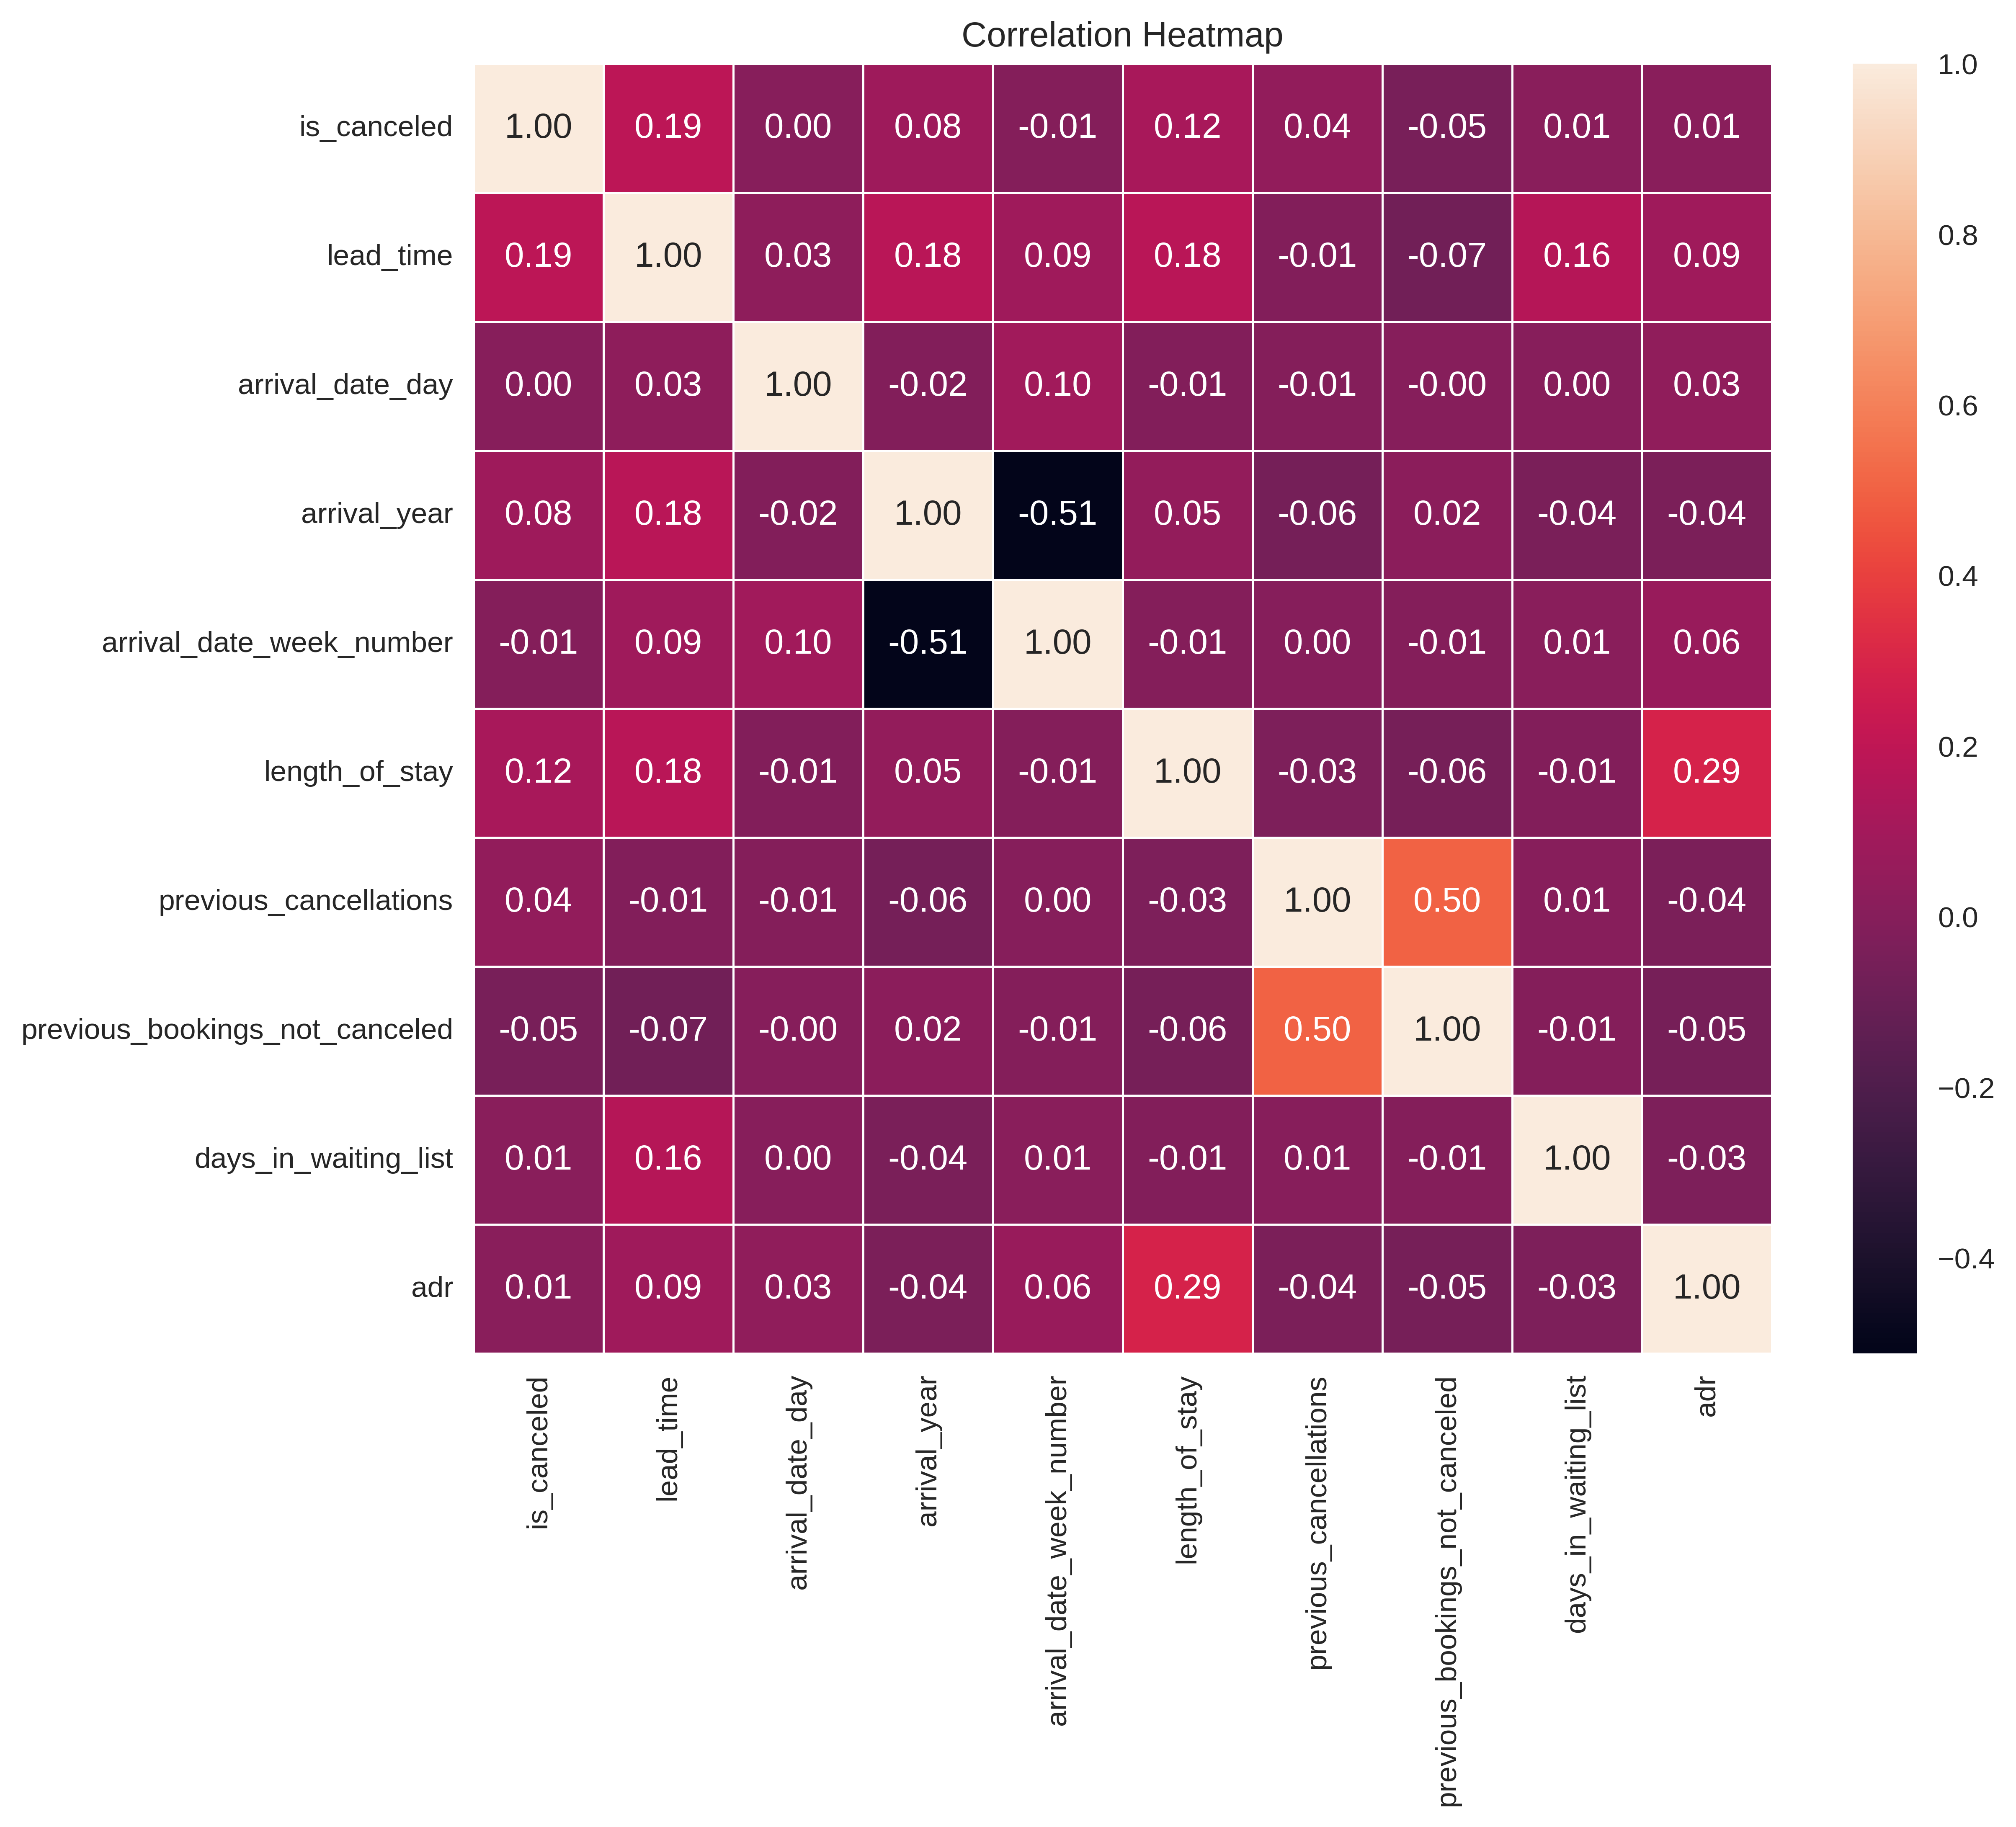

In [ ]:
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
#plt.title('Correlation Heatmap')
#plt.show()


plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(correlation_matrix,annot=True,fmt=".2f", linewidth=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#correaltions between age and sex columns
#c = np.corrcoef(df['age'],df['sex'])
#print('Correlations between age and sex\n',c)

#Correlation between is_canceled and lead time
c = np.corrcoef(City_CAdrop['is_canceled'],City_CAdrop['lead_time'])
print('Correlations between is_canceled and lead_time\n',c)

Correlations between is_canceled and lead_time
 [[1.         0.19076101]
 [0.19076101 1.        ]]


**Variable is_canceled berhubungan dengan lead_time dan previous_cancellations**

# **Modelling - Logistic Regression**

**Set Variable: to keep or and to drop**

In [ ]:
## Create correlation matrix
#corr_matrix = sep_users_feat.corr().abs()

## Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

## Find features with correlation greater than 0.7, and add into to_drop list
#to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
#to_drop

# Create correlation matrix
Correlation_matrix = City_CAdrop.corr().abs()

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

# Find features with the correlation greater than 0.65
to_drop = [column for column in upper.columns if any(upper[column] > 0.65)]
to_drop


<ipython-input-59-4855f9ae8f5d>:12: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-59-4855f9ae8f5d>:15: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[]

In [ ]:
corr_column = City_CAdrop.select_dtypes(include=[np.number]).columns.to_list()

In [ ]:
to_keep = list(set(corr_column) - set(to_drop))
to_keep

['previous_bookings_not_canceled',
 'arrival_year',
 'adr',
 'is_canceled',
 'previous_cancellations',
 'arrival_date_week_number',
 'days_in_waiting_list',
 'lead_time',
 'length_of_stay',
 'arrival_date_day']

In [ ]:
len(to_keep)

10

**Import libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
## Define the data
# X = sep_users_feat[to_keep]
# y = sep_users_trgt['flag_order_bond']

## Split into training and test dataset
# X_training, X_test, y_training, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

# Define the data
X = City_CAdrop[to_keep]
y = City_CAdrop['is_canceled']

# Split into training and test dataset
X_training, X_test, y_training, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_training, y_training)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.87
Confusion Matrix:
[[10297   852]
 [ 1204  3627]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     11149
           1       0.81      0.75      0.78      4831

    accuracy                           0.87     15980
   macro avg       0.85      0.84      0.84     15980
weighted avg       0.87      0.87      0.87     15980



**Alternative step**

In [ ]:
for df in [X_training, X_test, y_training, y_test]:
    df = df.values.reshape(-1, 1)

In [ ]:
print(df.shape)

(15980, 1)


In [ ]:
# Check class balance in each datasets
for df in [y_training,y_test]:
  df2 = df.value_counts()
  print(df2)

0    26085
1    11199
Name: is_canceled, dtype: int64
0    11149
1     4831
Name: is_canceled, dtype: int64


In [ ]:
# Fit the Logistic regression model
model = LogisticRegression(class_weight='balanced',max_iter=500)
model.fit(X_training, y_training)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(class_weight='balanced', max_iter=500)

In [ ]:
model.score(X_training, y_training)

0.9997317884347173

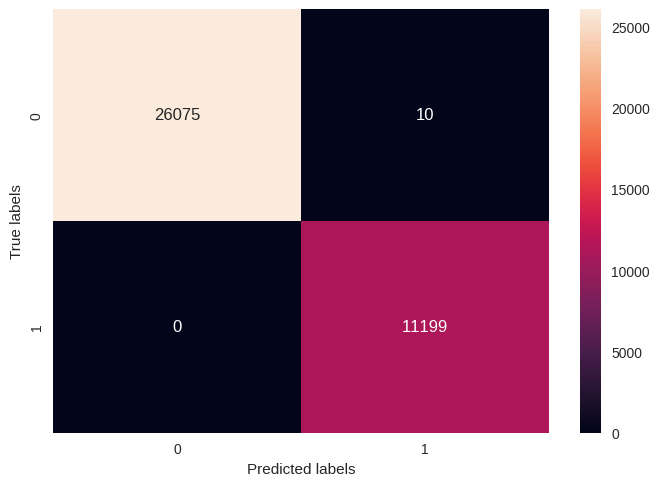

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_training, model.predict(X_training)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');

In [ ]:
model.score(X_test,y_test)

0.9995619524405507

# **Inspect Model Coeeficient**

In [ ]:
model_coef = {}
for i in range(len(to_keep)):
  model_coef[to_keep[i]] = model.coef_[0][i]

pd.DataFrame.from_dict(model_coef, orient='index').sort_values(by=[0])

,0
previous_bookings_not_canceled,-0.201193
arrival_year,-0.004552
adr,-0.000017
lead_time,0.000446
days_in_waiting_list,0.017662
arrival_date_week_number,0.021527
arrival_date_day,0.042938
length_of_stay,0.115143
previous_cancellations,0.780073
is_canceled,14.864273


Guest yang tetap melanjutkan proses booking adalah guest dengan history previous cancellation, adults, dengan children, waktu booking di hari weekend.


# **Clustering**

In [ ]:
City = CH.copy()

In [ ]:
City.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53264 entries, 0 to 79298
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           53264 non-null  object        
 1   is_canceled                     53264 non-null  int64         
 2   lead_time                       53264 non-null  int64         
 3   arrival_date                    53264 non-null  datetime64[ns]
 4   arrival_date_day                53264 non-null  int64         
 5   arrival_month                   53264 non-null  object        
 6   arrival_year                    53264 non-null  int64         
 7   arrival_month_year              53264 non-null  object        
 8   arrival_date_week_number        53264 non-null  int64         
 9   stays_in_weekend_nights         53264 non-null  int64         
 10  stays_in_week_nights            53264 non-null  int64         
 11  le

In [ ]:
City['RowNumber'] = range(1, len(City) + 1)
print(City)

            hotel  is_canceled  lead_time arrival_date  arrival_date_day  \
0      City Hotel            1         88   2015-07-01                 1   
1      City Hotel            1         65   2015-07-01                 1   
2      City Hotel            1         92   2015-07-01                 1   
3      City Hotel            1        100   2015-07-02                 2   
4      City Hotel            1         79   2015-07-02                 2   
...           ...          ...        ...          ...               ...   
79294  City Hotel            0         23   2017-08-30                30   
79295  City Hotel            0        102   2017-08-31                31   
79296  City Hotel            0         34   2017-08-31                31   
79297  City Hotel            0        109   2017-08-31                31   
79298  City Hotel            0        205   2017-08-29                29   

      arrival_month  arrival_year arrival_month_year  \
0               Jul          20

In [ ]:
City


,hotel,is_canceled,lead_time,arrival_date,arrival_date_day,arrival_month,arrival_year,arrival_month_year,arrival_date_week_number,stays_in_weekend_nights,...,is_use_agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,RowNumber
0,City Hotel,1,88,2015-07-01,1,Jul,2015,Jul 2015,27,0,...,1,0,0,Transient,765,0,1,Canceled,2015-07-01,1
1,City Hotel,1,65,2015-07-01,1,Jul,2015,Jul 2015,27,0,...,1,0,0,Transient,68,0,1,Canceled,2015-04-30,2
2,City Hotel,1,92,2015-07-01,1,Jul,2015,Jul 2015,27,2,...,1,0,0,Transient,765,0,2,Canceled,2015-06-23,3
3,City Hotel,1,100,2015-07-02,2,Jul,2015,Jul 2015,27,0,...,1,0,0,Transient,765,0,1,Canceled,2015-04-02,4
4,City Hotel,1,79,2015-07-02,2,Jul,2015,Jul 2015,27,0,...,1,0,0,Transient,765,0,1,Canceled,2015-06-25,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79294,City Hotel,0,23,2017-08-30,30,Aug,2017,Aug 2017,35,2,...,1,0,0,Transient,9614,0,0,Check-Out,2017-09-06,53260
79295,City Hotel,0,102,2017-08-31,31,Aug,2017,Aug 2017,35,2,...,1,0,0,Transient,22543,0,2,Check-Out,2017-09-07,53261
79296,City Hotel,0,34,2017-08-31,31,Aug,2017,Aug 2017,35,2,...,1,0,0,Transient,15771,0,4,Check-Out,2017-09-07,53262
79297,City Hotel,0,109,2017-08-31,31,Aug,2017,Aug 2017,35,2,...,1,0,0,Transient,1044,0,0,Check-Out,2017-09-07,53263


In [ ]:
City.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53264 entries, 0 to 79298
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           53264 non-null  object        
 1   is_canceled                     53264 non-null  int64         
 2   lead_time                       53264 non-null  int64         
 3   arrival_date                    53264 non-null  datetime64[ns]
 4   arrival_date_day                53264 non-null  int64         
 5   arrival_month                   53264 non-null  object        
 6   arrival_year                    53264 non-null  int64         
 7   arrival_month_year              53264 non-null  object        
 8   arrival_date_week_number        53264 non-null  int64         
 9   stays_in_weekend_nights         53264 non-null  int64         
 10  stays_in_week_nights            53264 non-null  int64         
 11  le

In [ ]:
City['RowNumber'] = City['RowNumber'].astype(str)

## **Dropping columns**

In [ ]:
City_ = City.copy()

In [ ]:
#df_clustdrop = df_clust.drop(['transaction_id', 'product_id','first_name', 'last_name', 'address', 'state', 'job_title', 'job_industry_category', 'transaction_date','online_order', 'product_first_sold_date'], axis=1)

In [ ]:
City_drop = City_.drop(['hotel', 'arrival_date', 'arrival_month', 'arrival_year', 'arrival_month_year','assigned_room_type','is_room_change','agent','total_of_special_requests',
                       'reservation_status_date', 'country', 'subregion', 'reserved_room_type', 'continent', 'meal', 'arrival_date_day', 'previous_cancellations', 'previous_bookings_not_canceled',
                       'days_in_waiting_list', 'booking_changes', 'company', 'adr', 'stays_in_weekend_nights','stays_in_week_nights', 'required_car_parking_spaces', 'adults', 'children',
                       'babies', 'lead_time'],axis=1)

In [ ]:
City_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53264 entries, 0 to 79298
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   is_canceled               53264 non-null  int64 
 1   arrival_date_week_number  53264 non-null  int64 
 2   length_of_stay            53264 non-null  int64 
 3   market_segment            53264 non-null  object
 4   distribution_channel      53264 non-null  object
 5   is_repeated_guest         53264 non-null  object
 6   deposit_type              53264 non-null  object
 7   is_use_agent              53264 non-null  object
 8   customer_type             53264 non-null  object
 9   reservation_status        53264 non-null  object
 10  RowNumber                 53264 non-null  object
dtypes: int64(3), object(8)
memory usage: 4.9+ MB


Clustering modeling cannot use string data types, so we need to encode categorical variables. Untuk yang kategorinya hanya ada 2 tipe, kita beri label dengan 0 dan 1.

is_canceled:
No = 0
Yes = 1

is_use_agent:
no = 0
yes = 1

is_repeated_guest:
no = 1
yes = 1

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

for cat_var in ['is_canceled', 'is_repeated_guest', 'is_use_agent']:
  City_drop[cat_var] = le.fit_transform(City_drop[cat_var])

City_drop

,is_canceled,arrival_date_week_number,length_of_stay,market_segment,distribution_channel,is_repeated_guest,deposit_type,is_use_agent,customer_type,reservation_status,RowNumber
0,1,27,4,Online TA,TA/TO,0,No Deposit,1,Transient,Canceled,1
1,1,27,4,Online TA,TA/TO,0,No Deposit,1,Transient,Canceled,2
2,1,27,6,Online TA,TA/TO,0,No Deposit,1,Transient,Canceled,3
3,1,27,2,Online TA,TA/TO,0,No Deposit,1,Transient,Canceled,4
4,1,27,3,Online TA,TA/TO,0,No Deposit,1,Transient,Canceled,5
...,...,...,...,...,...,...,...,...,...,...,...
79294,0,35,7,Offline TA/TO,TA/TO,0,No Deposit,1,Transient,Check-Out,53260
79295,0,35,7,Online TA,TA/TO,0,No Deposit,1,Transient,Check-Out,53261
79296,0,35,7,Online TA,TA/TO,0,No Deposit,1,Transient,Check-Out,53262
79297,0,35,7,Online TA,TA/TO,0,No Deposit,1,Transient,Check-Out,53263


## **One Hot Encoding**

In [ ]:
City_drop = pd.get_dummies(City_drop, columns=['market_segment', 'distribution_channel', 'deposit_type','customer_type', 'reservation_status'])
City_drop

,is_canceled,arrival_date_week_number,length_of_stay,is_repeated_guest,is_use_agent,RowNumber,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,1,27,4,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,1,27,4,0,1,2,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,1,27,6,0,1,3,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
3,1,27,2,0,1,4,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4,1,27,3,0,1,5,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79294,0,35,7,0,1,53260,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
79295,0,35,7,0,1,53261,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
79296,0,35,7,0,1,53262,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
79297,0,35,7,0,1,53263,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
City_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53264 entries, 0 to 79298
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   is_canceled                     53264 non-null  int64 
 1   arrival_date_week_number        53264 non-null  int64 
 2   length_of_stay                  53264 non-null  int64 
 3   is_repeated_guest               53264 non-null  int64 
 4   is_use_agent                    53264 non-null  int64 
 5   RowNumber                       53264 non-null  object
 6   market_segment_Aviation         53264 non-null  uint8 
 7   market_segment_Complementary    53264 non-null  uint8 
 8   market_segment_Corporate        53264 non-null  uint8 
 9   market_segment_Direct           53264 non-null  uint8 
 10  market_segment_Groups           53264 non-null  uint8 
 11  market_segment_Offline TA/TO    53264 non-null  uint8 
 12  market_segment_Online TA        53264 non-null

## **Scaler**

In [ ]:
scaler = MinMaxScaler()
std_data = City_drop.set_index('RowNumber')
std_data[:] = scaler.fit_transform(std_data[:])
std_data

<ipython-input-143-0f7402cafa0e>:3: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



,is_canceled,arrival_date_week_number,length_of_stay,is_repeated_guest,is_use_agent,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
RowNumber,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.500000,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.500000,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.500000,0.125000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.500000,0.041667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,1.0,0.500000,0.062500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53260,0.0,0.653846,0.145833,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
53261,0.0,0.653846,0.145833,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
53262,0.0,0.653846,0.145833,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## **K-Means**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from datetime import datetime
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



1 105074.91922554016


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



2 71366.16704223199


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



3 53223.75284424418


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



4 41891.69996398008


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



5 35078.633887619304


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



6 29544.527626054543


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



7 26167.76994302168


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



8 23928.547014119024


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



9 22127.095469052903


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



10 20246.826017183972


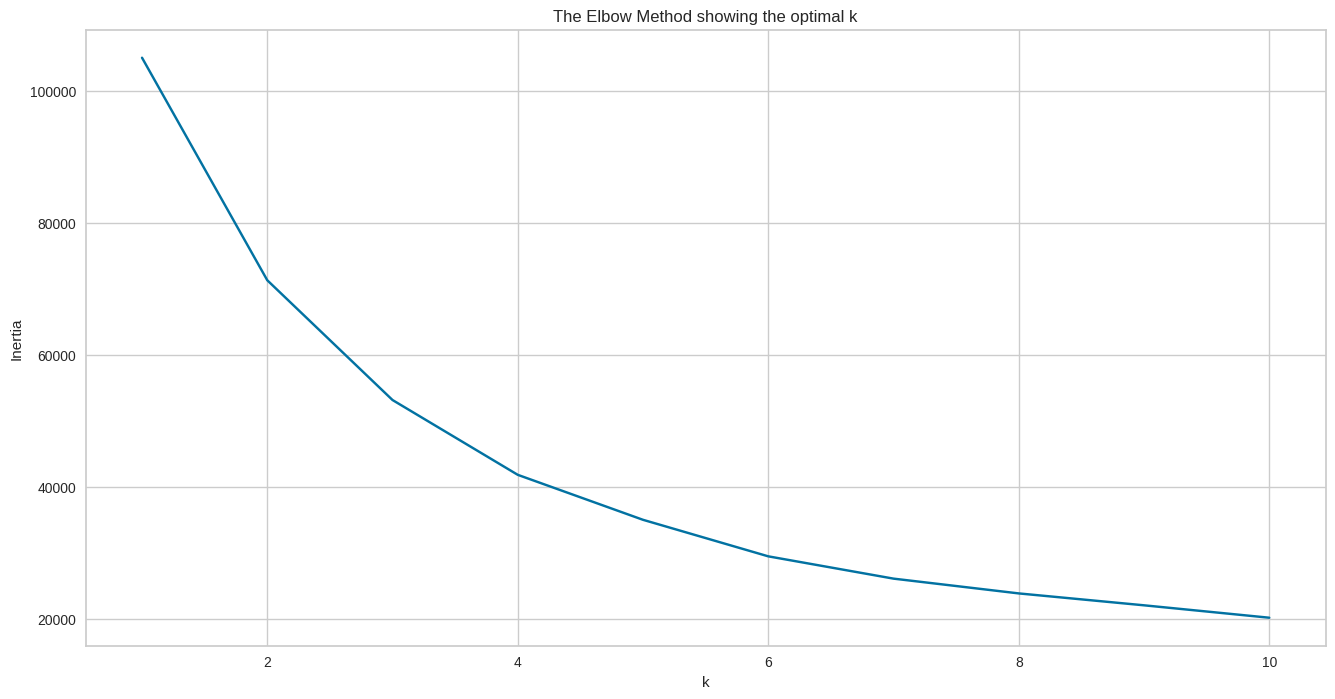

In [ ]:
distortions = []
K = range(1,11)
for k in K:
  kmeanModel = cluster.KMeans(n_clusters=k)
  kmeanModel.fit(std_data)
  distortions.append(kmeanModel.inertia_)
  print(k, kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## **Validation by Sillhouette**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=2, the average silhouette score is 0.41857161078709226


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=3, the average silhouette score is 0.482793080649342


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=4, the average silhouette score is 0.5221756872528479


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=5, the average silhouette score is 0.5537030579192553


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=6, the average silhouette score is 0.5754414358017169


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=7, the average silhouette score is 0.5900802958672435


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=8, the average silhouette score is 0.6226576678464076


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=9, the average silhouette score is 0.6415201674597144


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=10, the average silhouette score is 0.6522147190767914


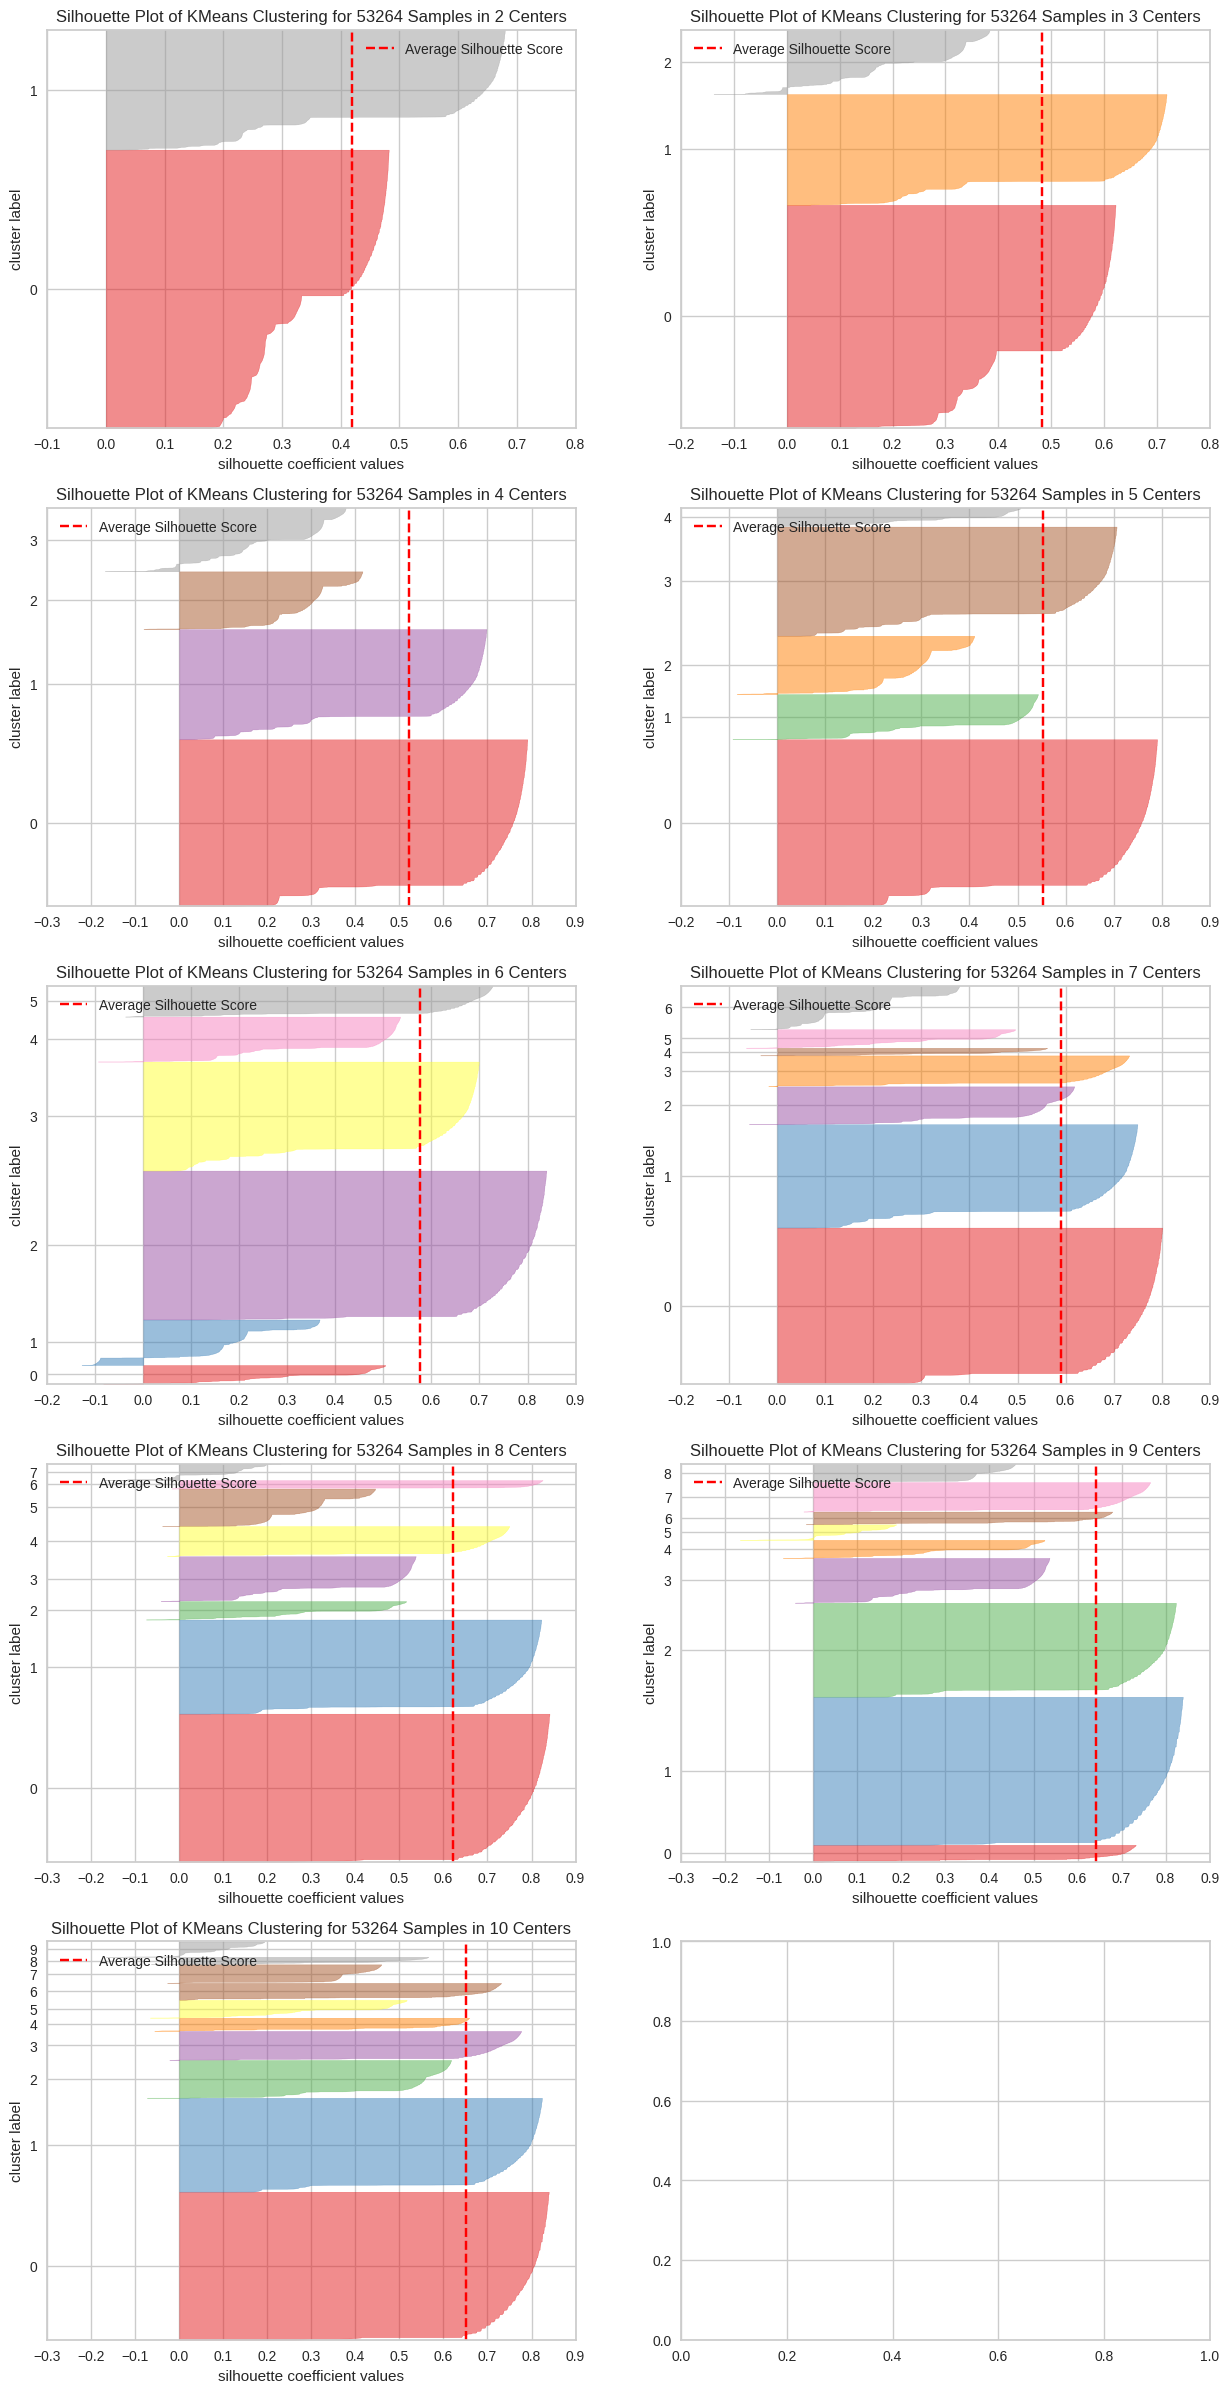

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(std_data)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [ ]:
cluster_model = cluster.KMeans(n_clusters=3)
cluster_model.fit(std_data)
cluster_label = cluster_model.labels_
std_data['cluster'] = cluster_label
df_result = std_data.reset_index()[['RowNumber','cluster']]
df_result

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,RowNumber,cluster
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
53259,53260,0
53260,53261,0
53261,53262,0
53262,53263,0


## **Merged Clustering Data and Original Data**

In [ ]:
df_result = pd.merge(City_, df_result, on=['RowNumber'])
df_result

,hotel,is_canceled,lead_time,arrival_date,arrival_date_day,arrival_month,arrival_year,arrival_month_year,arrival_date_week_number,stays_in_weekend_nights,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,RowNumber,cluster
0,City Hotel,1,88,2015-07-01,1,Jul,2015,Jul 2015,27,0,...,0,0,Transient,765,0,1,Canceled,2015-07-01,1,1
1,City Hotel,1,65,2015-07-01,1,Jul,2015,Jul 2015,27,0,...,0,0,Transient,68,0,1,Canceled,2015-04-30,2,1
2,City Hotel,1,92,2015-07-01,1,Jul,2015,Jul 2015,27,2,...,0,0,Transient,765,0,2,Canceled,2015-06-23,3,1
3,City Hotel,1,100,2015-07-02,2,Jul,2015,Jul 2015,27,0,...,0,0,Transient,765,0,1,Canceled,2015-04-02,4,1
4,City Hotel,1,79,2015-07-02,2,Jul,2015,Jul 2015,27,0,...,0,0,Transient,765,0,1,Canceled,2015-06-25,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53259,City Hotel,0,23,2017-08-30,30,Aug,2017,Aug 2017,35,2,...,0,0,Transient,9614,0,0,Check-Out,2017-09-06,53260,0
53260,City Hotel,0,102,2017-08-31,31,Aug,2017,Aug 2017,35,2,...,0,0,Transient,22543,0,2,Check-Out,2017-09-07,53261,0
53261,City Hotel,0,34,2017-08-31,31,Aug,2017,Aug 2017,35,2,...,0,0,Transient,15771,0,4,Check-Out,2017-09-07,53262,0
53262,City Hotel,0,109,2017-08-31,31,Aug,2017,Aug 2017,35,2,...,0,0,Transient,1044,0,0,Check-Out,2017-09-07,53263,0


In [ ]:
df_result.groupby(['cluster'])[['RowNumber']].count()

,RowNumber
cluster,
0,29861
1,15591
2,7812


In [ ]:
City_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53264 entries, 0 to 79298
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           53264 non-null  object        
 1   is_canceled                     53264 non-null  int64         
 2   lead_time                       53264 non-null  int64         
 3   arrival_date                    53264 non-null  datetime64[ns]
 4   arrival_date_day                53264 non-null  int64         
 5   arrival_month                   53264 non-null  object        
 6   arrival_year                    53264 non-null  int64         
 7   arrival_month_year              53264 non-null  object        
 8   arrival_date_week_number        53264 non-null  int64         
 9   stays_in_weekend_nights         53264 non-null  int64         
 10  stays_in_week_nights            53264 non-null  int64         
 11  le

## **Define Column**

In [ ]:
categorical_col = ['is_canceled', 'is_use_agent', 'previous_cancellations', 'previous_bookings_not_canceled', 'country', 'continent', 'subregion', 'company', 'meal','market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status', 'arrival_month']
invested_col = ['adr', 'lead_time', 'length_of_stay', 'days_in_waiting_list']
frequency_col = ['adults', 'children', 'babies']

## **Profiling Cluster**

In [ ]:
df_cluster_0 = df_result[df_result['cluster'] == 0]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster_0[col].value_counts(normalize=True))
  print('\n')

df_invested = df_cluster_0[invested_col].agg(['mean'])
df_frequency = df_cluster_0[frequency_col].agg(['min','max'])

print(df_frequency)
df_invested

Value counts on is_canceled collumn:
0    1.0
Name: is_canceled, dtype: float64


Value counts on is_use_agent collumn:
1    0.9856
0    0.0144
Name: is_use_agent, dtype: float64


Value counts on previous_cancellations collumn:
0     0.998727
11    0.000837
2     0.000335
1     0.000067
3     0.000033
Name: previous_cancellations, dtype: float64


Value counts on previous_bookings_not_canceled collumn:
0     0.991963
1     0.005191
2     0.000670
4     0.000469
5     0.000301
3     0.000234
10    0.000167
9     0.000134
12    0.000100
6     0.000100
22    0.000100
7     0.000067
8     0.000067
11    0.000067
16    0.000067
13    0.000067
14    0.000067
21    0.000033
20    0.000033
19    0.000033
15    0.000033
17    0.000033
Name: previous_bookings_not_canceled, dtype: float64


Value counts on country collumn:
FRA    0.170892
PRT    0.165735
DEU    0.107967
GBR    0.095107
ESP    0.070962
         ...   
UGA    0.000033
GUY    0.000033
LCA    0.000033
GAB    0.000033
FRO    0.000033

,adr,lead_time,length_of_stay,days_in_waiting_list
mean,2981.949131,74.936372,3.118047,1.17625


In [ ]:
df_cluster_1 = df_result[df_result['cluster'] == 1]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster_1[col].value_counts(normalize=True))
  print('\n')

df_invested = df_cluster_1[invested_col].agg(['mean'])
df_frequency = df_cluster_1[frequency_col].agg(['min','max'])

print(df_frequency)
df_invested

Value counts on is_canceled collumn:
1    1.0
Name: is_canceled, dtype: float64


Value counts on is_use_agent collumn:
1    0.971201
0    0.028799
Name: is_use_agent, dtype: float64


Value counts on previous_cancellations collumn:
0     0.950805
1     0.047399
2     0.000706
3     0.000385
13    0.000192
4     0.000192
6     0.000128
21    0.000064
5     0.000064
11    0.000064
Name: previous_cancellations, dtype: float64


Value counts on previous_bookings_not_canceled collumn:
0     0.995125
1     0.001475
2     0.000513
5     0.000449
3     0.000385
4     0.000385
7     0.000257
10    0.000192
11    0.000192
15    0.000128
12    0.000128
6     0.000128
58    0.000064
48    0.000064
26    0.000064
16    0.000064
8     0.000064
27    0.000064
25    0.000064
29    0.000064
14    0.000064
17    0.000064
Name: previous_bookings_not_canceled, dtype: float64


Value counts on country collumn:
PRT    0.289398
FRA    0.098583
GBR    0.083253
ESP    0.071580
ITA    0.064268
         ...   


,adr,lead_time,length_of_stay,days_in_waiting_list
mean,2884.760759,103.598166,3.516259,1.208261


In [ ]:
df_cluster_2 = df_result[df_result['cluster'] == 2]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster_2[col].value_counts(normalize=True))
  print('\n')

df_invested = df_cluster_2[invested_col].agg(['mean'])
df_frequency = df_cluster_2[frequency_col].agg(['min','max'])

print(df_frequency)
df_invested

Value counts on is_canceled collumn:
0    0.943804
1    0.056196
Name: is_canceled, dtype: float64


Value counts on is_use_agent collumn:
0    0.596646
1    0.403354
Name: is_use_agent, dtype: float64


Value counts on previous_cancellations collumn:
0     0.952765
1     0.028546
2     0.006272
3     0.005632
4     0.002688
5     0.001920
6     0.001920
13    0.000128
11    0.000128
Name: previous_cancellations, dtype: float64


Value counts on previous_bookings_not_canceled collumn:
0     0.845366
1     0.044163
2     0.020993
3     0.014593
4     0.010369
        ...   
47    0.000128
48    0.000128
49    0.000128
50    0.000128
72    0.000128
Name: previous_bookings_not_canceled, Length: 73, dtype: float64


Value counts on country collumn:
PRT    0.468254
FRA    0.097158
ESP    0.069380
GBR    0.048899
DEU    0.040195
         ...   
IDN    0.000128
THA    0.000128
DOM    0.000128
EGY    0.000128
LBN    0.000128
Name: country, Length: 96, dtype: float64


Value counts on continent

,adr,lead_time,length_of_stay,days_in_waiting_list
mean,1731.434972,37.284306,2.485791,0.048771


In [ ]:
df_cluster_3 = df_result[df_result['cluster'] == 3]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster_0[col].value_counts(normalize=True))
  print('\n')

df_invested = df_cluster_3[invested_col].agg(['mean'])
df_frequency = df_cluster_3[frequency_col].agg(['min','max'])

print(df_frequency)
df_invested

Value counts on is_canceled collumn:
1    1.0
Name: is_canceled, dtype: float64


Value counts on is_use_agent collumn:
1    0.880514
0    0.119486
Name: is_use_agent, dtype: float64


Value counts on previous_cancellations collumn:
0    0.746220
1    0.253313
6    0.000468
Name: previous_cancellations, dtype: float64


Value counts on previous_bookings_not_canceled collumn:
0     0.999922
29    0.000078
Name: previous_bookings_not_canceled, dtype: float64


Value counts on country collumn:
PRT    0.990335
ESP    0.005846
POL    0.002884
FRA    0.000779
CHE    0.000078
DEU    0.000078
Name: country, dtype: float64


Value counts on continent collumn:
Europe    1.0
Name: continent, dtype: float64


Value counts on subregion collumn:
Southern Europe    0.996181
Eastern Europe     0.002884
Western Europe     0.000935
Name: subregion, dtype: float64


Value counts on company collumn:
0      0.972097
67     0.007794
348    0.004599
202    0.002962
197    0.002728
385    0.002338
51     0.00

,adr
mean,1569.685277


In [ ]:
df_cluster_4 = df_result[df_result['cluster'] == 4]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster_0[col].value_counts(normalize=True))
  print('\n')

df_invested = df_cluster_4[invested_col].agg(['mean'])
df_frequency = df_cluster_4[frequency_col].agg(['min','max'])

print(df_frequency)
df_invested

Value counts on is_canceled collumn:
0    1.0
Name: is_canceled, dtype: float64


Value counts on is_use_agent collumn:
0    0.575496
1    0.424504
Name: is_use_agent, dtype: float64


Value counts on previous_cancellations collumn:
0     0.954293
1     0.026577
2     0.005987
3     0.005695
4     0.003067
6     0.002190
5     0.002044
13    0.000146
Name: previous_cancellations, dtype: float64


Value counts on previous_bookings_not_canceled collumn:
0     0.838785
1     0.046437
2     0.020736
3     0.015479
4     0.010368
        ...   
46    0.000146
47    0.000146
48    0.000146
49    0.000146
72    0.000146
Name: previous_bookings_not_canceled, Length: 71, dtype: float64


Value counts on country collumn:
PRT    0.455315
FRA    0.105724
ESP    0.074474
GBR    0.055199
DEU    0.042348
         ...   
ATA    0.000146
IDN    0.000146
GAB    0.000146
GEO    0.000146
LBN    0.000146
Name: country, Length: 90, dtype: float64


Value counts on continent collumn:
Europe         0.892961


,adr
mean,1794.925088


In [ ]:
df_result.to_csv('City_result230823.csv', index=False)

# **HERE**

Label encoder